<a href="https://colab.research.google.com/github/info17tech/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,  roc_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/info17tech/Customer-Churn-Prediction/refs/heads/main/Data_Science_Challenge.csv"
df = pd.read_csv(url)
df_copy = df.copy()
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [ ]:
# rows, columns
df.shape

(3333, 21)

In [ ]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
# missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
# duplicate values
df.duplicated().sum()

0

In [ ]:
# remove null values
df.dropna(inplace=True)

# remove duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
# summary statistics : numerical variables
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [ ]:
# summary statistics : categorical variables
df.describe(include='object')

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     382-4657                 no              no
freq     106            1               3010            2411

In [ ]:
# Outlier Detection
def detect_outlier_iqr(df):
  outlier_count = {}
  for col in df.select_dtypes(include='number'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count[col] = len(outliers)
  return outlier_count

# Detect outliers in all numeric columns
outliers_iqr = detect_outlier_iqr(df)
outliers_df = pd.DataFrame(list(outliers_iqr.items()), columns=['Column', 'Outlier Count'])
outliers_df

Column  Outlier Count
0           account length             18
1                area code              0
2    number vmail messages              1
3        total day minutes             25
4          total day calls             23
5         total day charge             25
6        total eve minutes             24
7          total eve calls             20
8         total eve charge             24
9      total night minutes             30
10       total night calls             22
11      total night charge             30
12      total intl minutes             46
13        total intl calls             78
14       total intl charge             49
15  customer service calls            267

Class balance in dataframe (as percentage): 
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


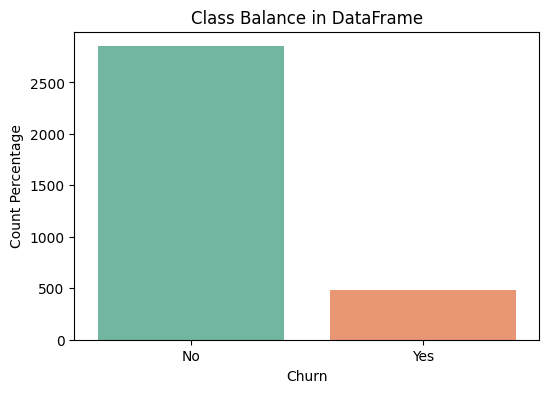

In [ ]:
class_balance = df['churn'].value_counts(normalize=True)*100
print("Class balance in dataframe (as percentage): ")
print(class_balance)

# Plot the class balance
plt.figure(figsize=(6, 4))
sns.countplot (x='churn', data=df, hue='churn', palette='Set2', legend=False)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Class Balance in DataFrame')
plt.xlabel('Churn')
plt.ylabel('Count Percentage')
plt.show()

In [ ]:
# correct the data type of area code
df['area code'] = df['area code'].astype('object')
df.describe(include='object')

state  area code phone number international plan voice mail plan
count   3333       3333         3333               3333            3333
unique    51          3         3333                  2               2
top       WV        415     382-4657                 no              no
freq     106       1655            1               3010            2411

In [ ]:
# drop unwanted features which will not give any insights
df['phone number'].str.replace('-', '').str.len().value_counts()

phone number
7    3333
Name: count, dtype: int64

In [ ]:
# drop phone number column
df.drop('phone number', axis=1, inplace=True)

In [ ]:
df.sample(n=5)

state  account length area code international plan voice mail plan  \
121     TX              41       408                 no             yes   
1536    AR              95       415                 no              no   
193     MT              94       415                 no              no   
289     OK              89       510                 no              no   
2687    MN             125       415                yes             yes   

      number vmail messages  total day minutes  total day calls  \
121                      22              213.8              102   
1536                      0               69.4               79   
193                       0              137.5              118   
289                       0              303.9               95   
2687                     29              260.8               81   

      total day charge  total eve minutes  total eve calls  total eve charge  \
121              36.35              141.8               86             12.05   
1536             11.80              190.8              109             16.22   
193              23.38              203.2               88             17.27   
289              51.66              260.9              114             22.18   
2687             44.34              163.7              112             13.91   

      total night minutes  total night calls  total night charge  \
121                 142.2                123                6.40   
1536                219.9                102                9.90   
193                 150.0                131                6.75   
289                 312.1                 89               14.04   
2687                271.7                117               12.23   

      total intl minutes  total intl calls  total intl charge  \
121                  7.2                 3               1.94   
1536                 8.9                 5               2.40   
193                 13.4                 2               3.62   
289                  5.3                 3               1.43   
2687                17.0                 6               4.59   

      customer service calls  churn  
121                        0  False  
1536                       0  False  
193                        0  False  
289                        1   True  
2687                       1   True

## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

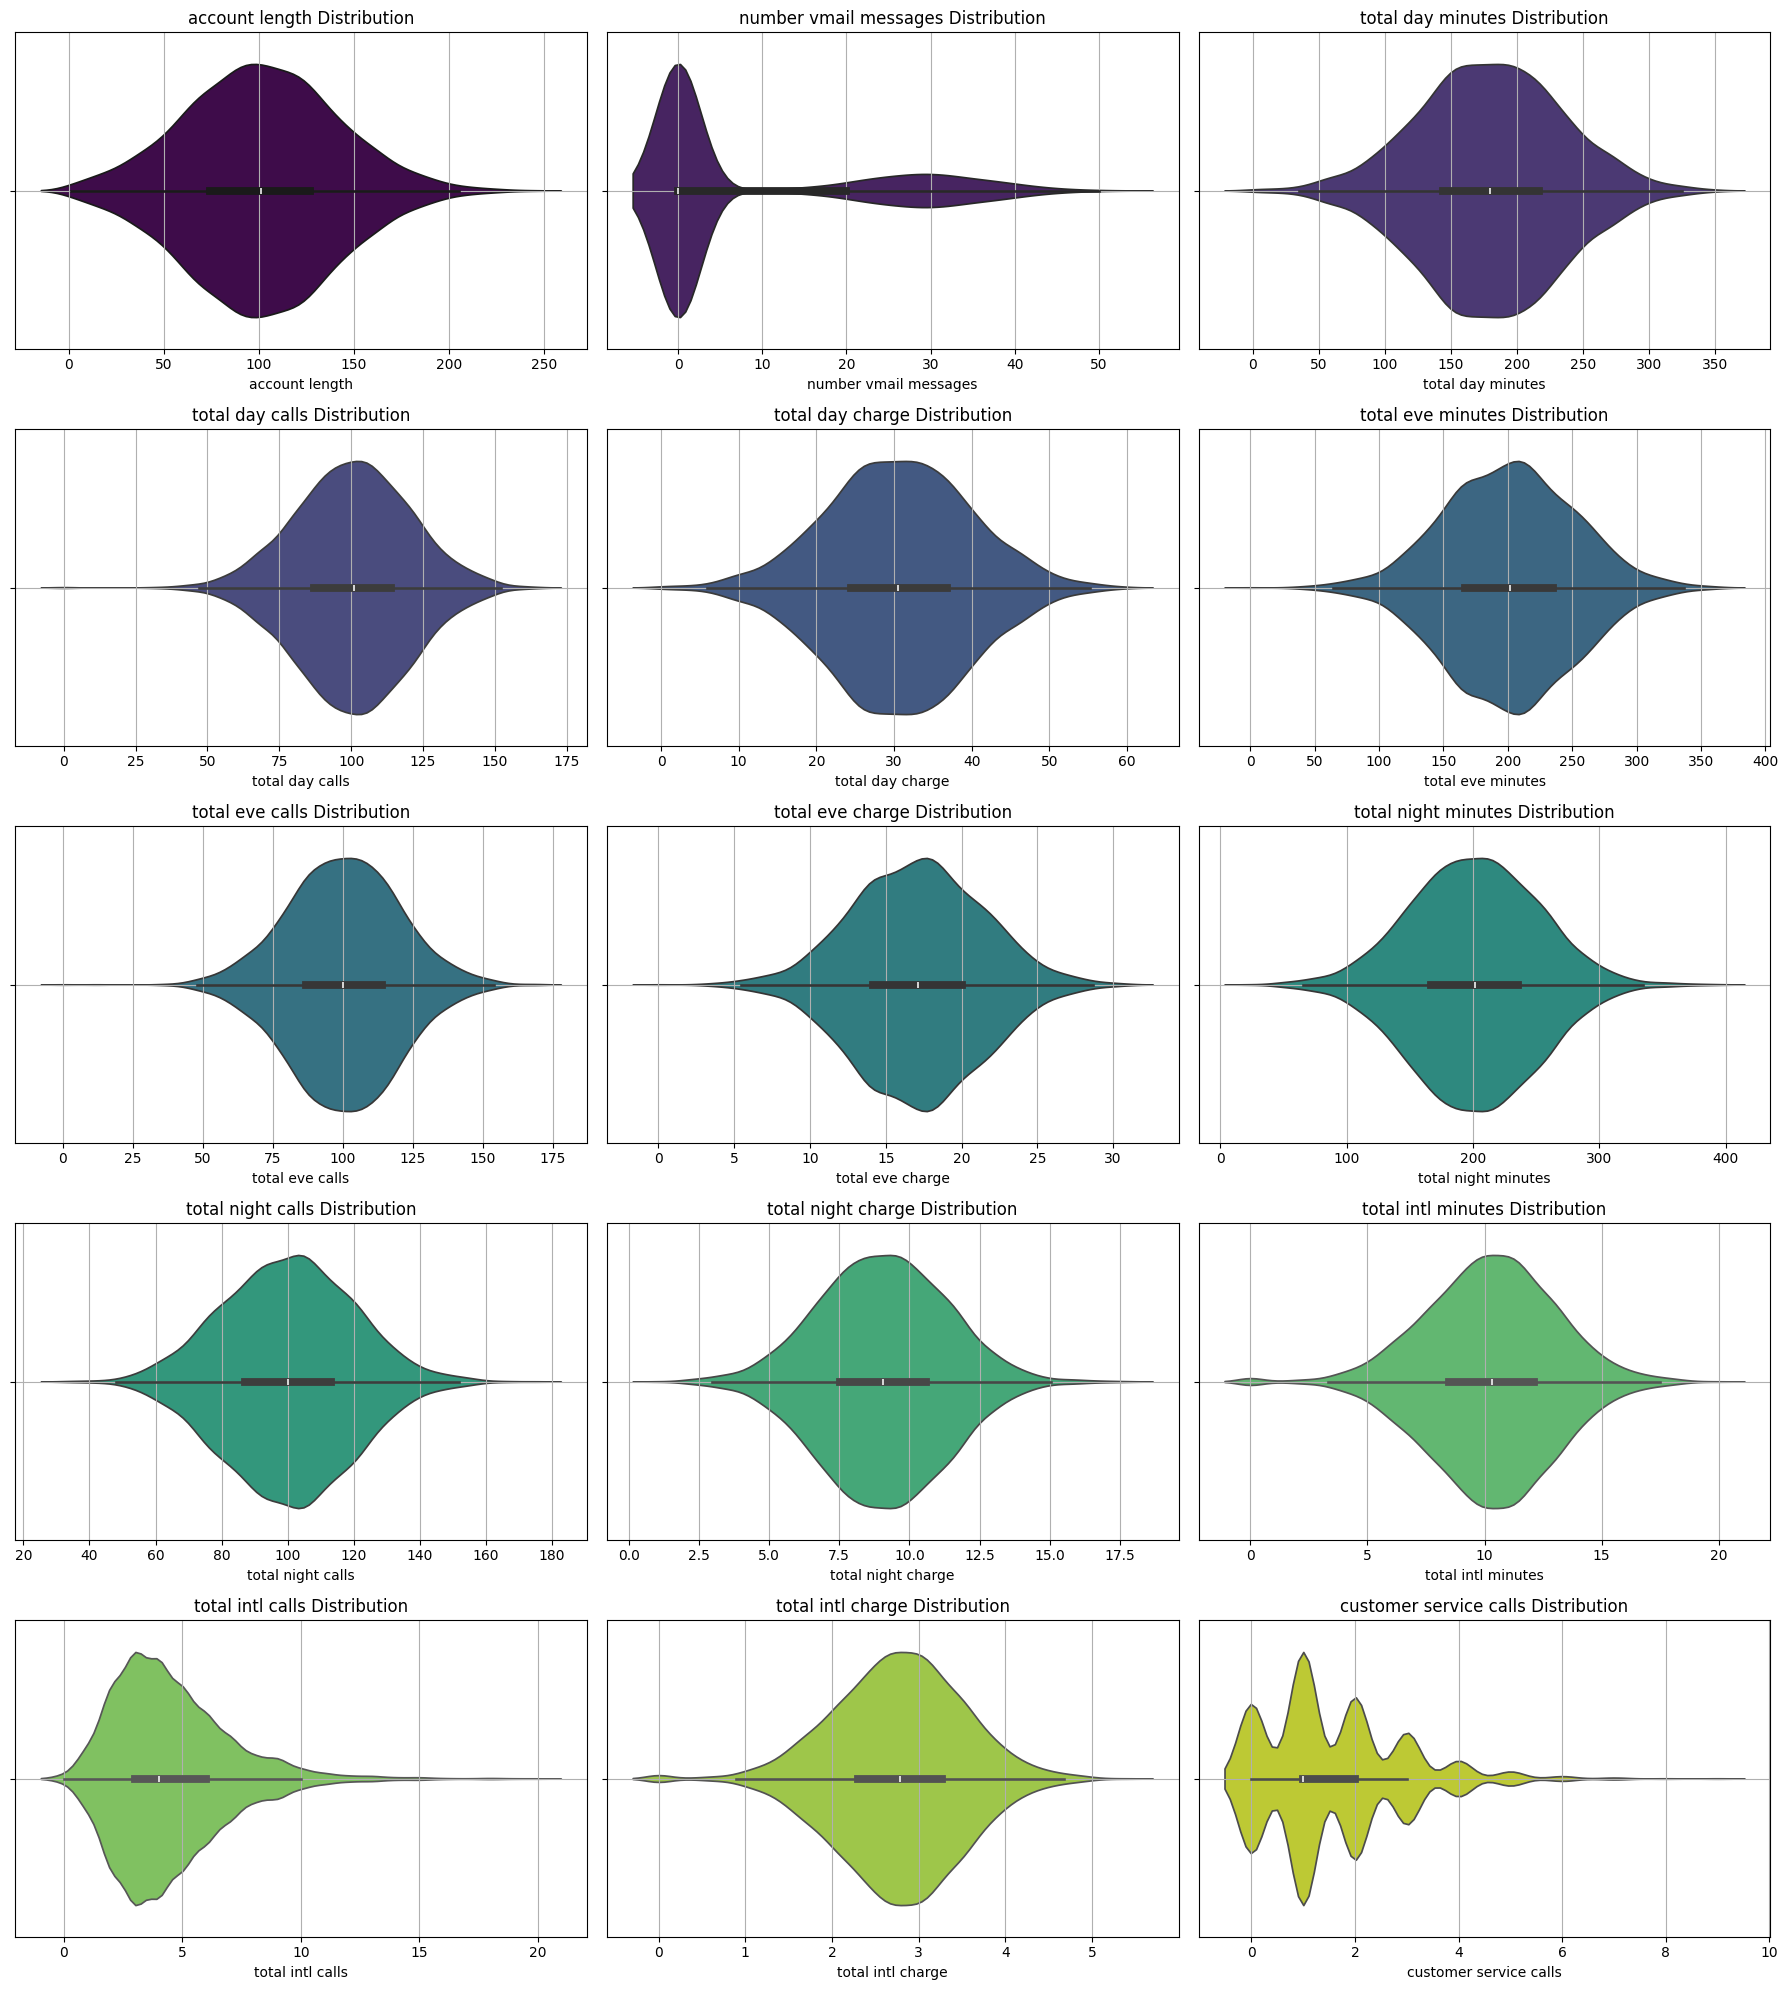

In [ ]:
# Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['float64','int64']).columns

fig, axes = plt.subplots(len(numerical_features)//3, 3, figsize=(18, 20))
cmap = plt.get_cmap('viridis')

for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i,3)
    color = cmap(i / len(numerical_features))
    sns.violinplot(x=col, data=df, ax=axes[row,col_idx], color=color)
    axes[row,col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].grid(True)

# when there are odd number of subplots
if len(numerical_features) % 3 != 0:
    for j in range(len(numerical_features) % 3, 3):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

<ipython-input-18-40b8cef8e62e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=df[feature], data=df, ax=axs[i], order=df[feature].value_counts().index, palette=palette[:num_colors])
<ipython-input-18-40b8cef8e62e>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-18-40b8cef8e62e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=df[feature], data=df, ax=axs[i], order=df[feature].value_counts().index, palette=palette[:num_colors])
<ipython-input-18-40b8cef8e62e>:19: UserWarning: 

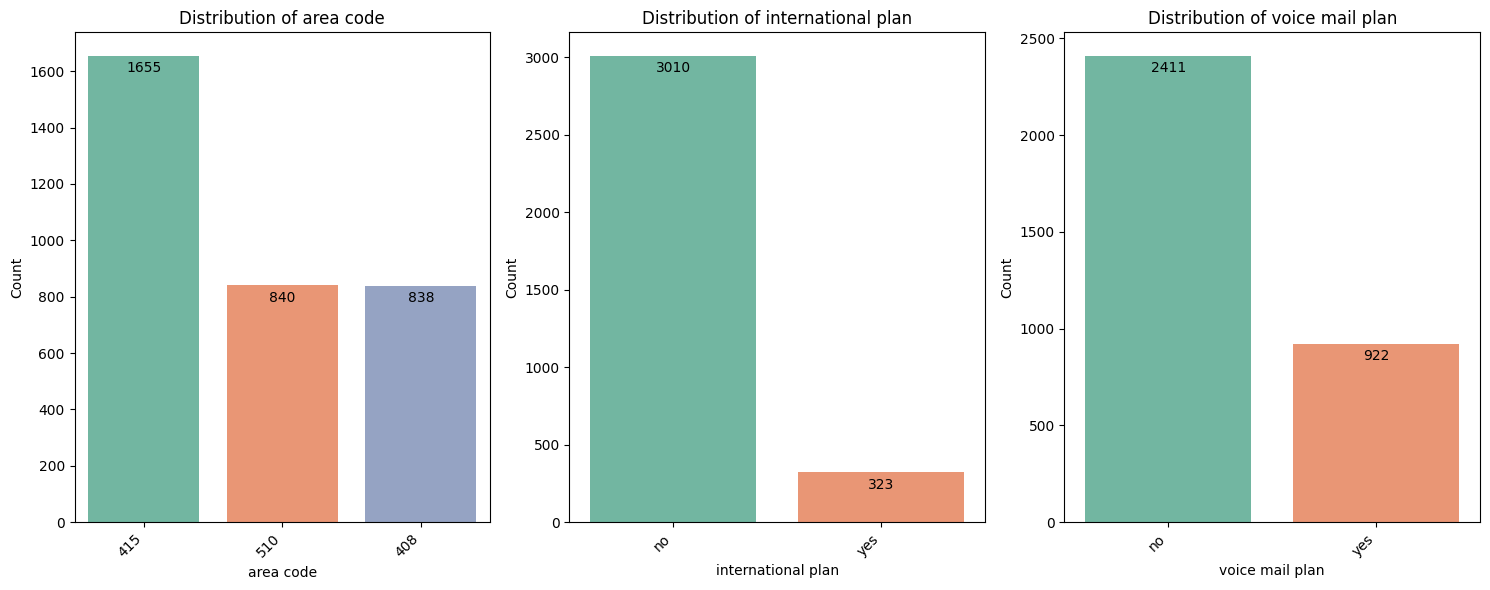

In [ ]:
# Distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('state')

fig, axs = plt.subplots(1, 3, figsize=(15,6))
axs = axs.flatten()
palette = sns.color_palette("Set2")

for i, feature in enumerate(categorical_features[:10]):
    num_colors = len(df[feature].unique())
    plot = sns.countplot(x=df[feature], data=df, ax=axs[i], order=df[feature].value_counts().index, palette=palette[:num_colors])

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va='center',
                      xytext=(0, -9), textcoords='offset points')

    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

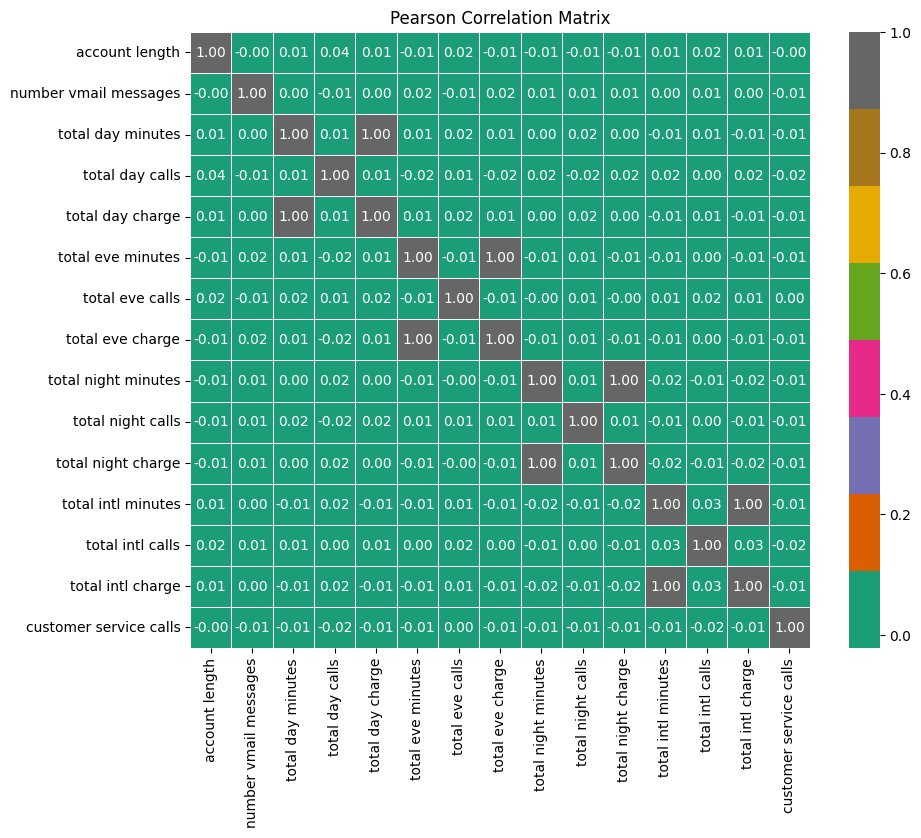

In [ ]:
# Correlation matrix for numerical features
pearson_correlation_matrix = df[numerical_features].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f", cmap='Dark2', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

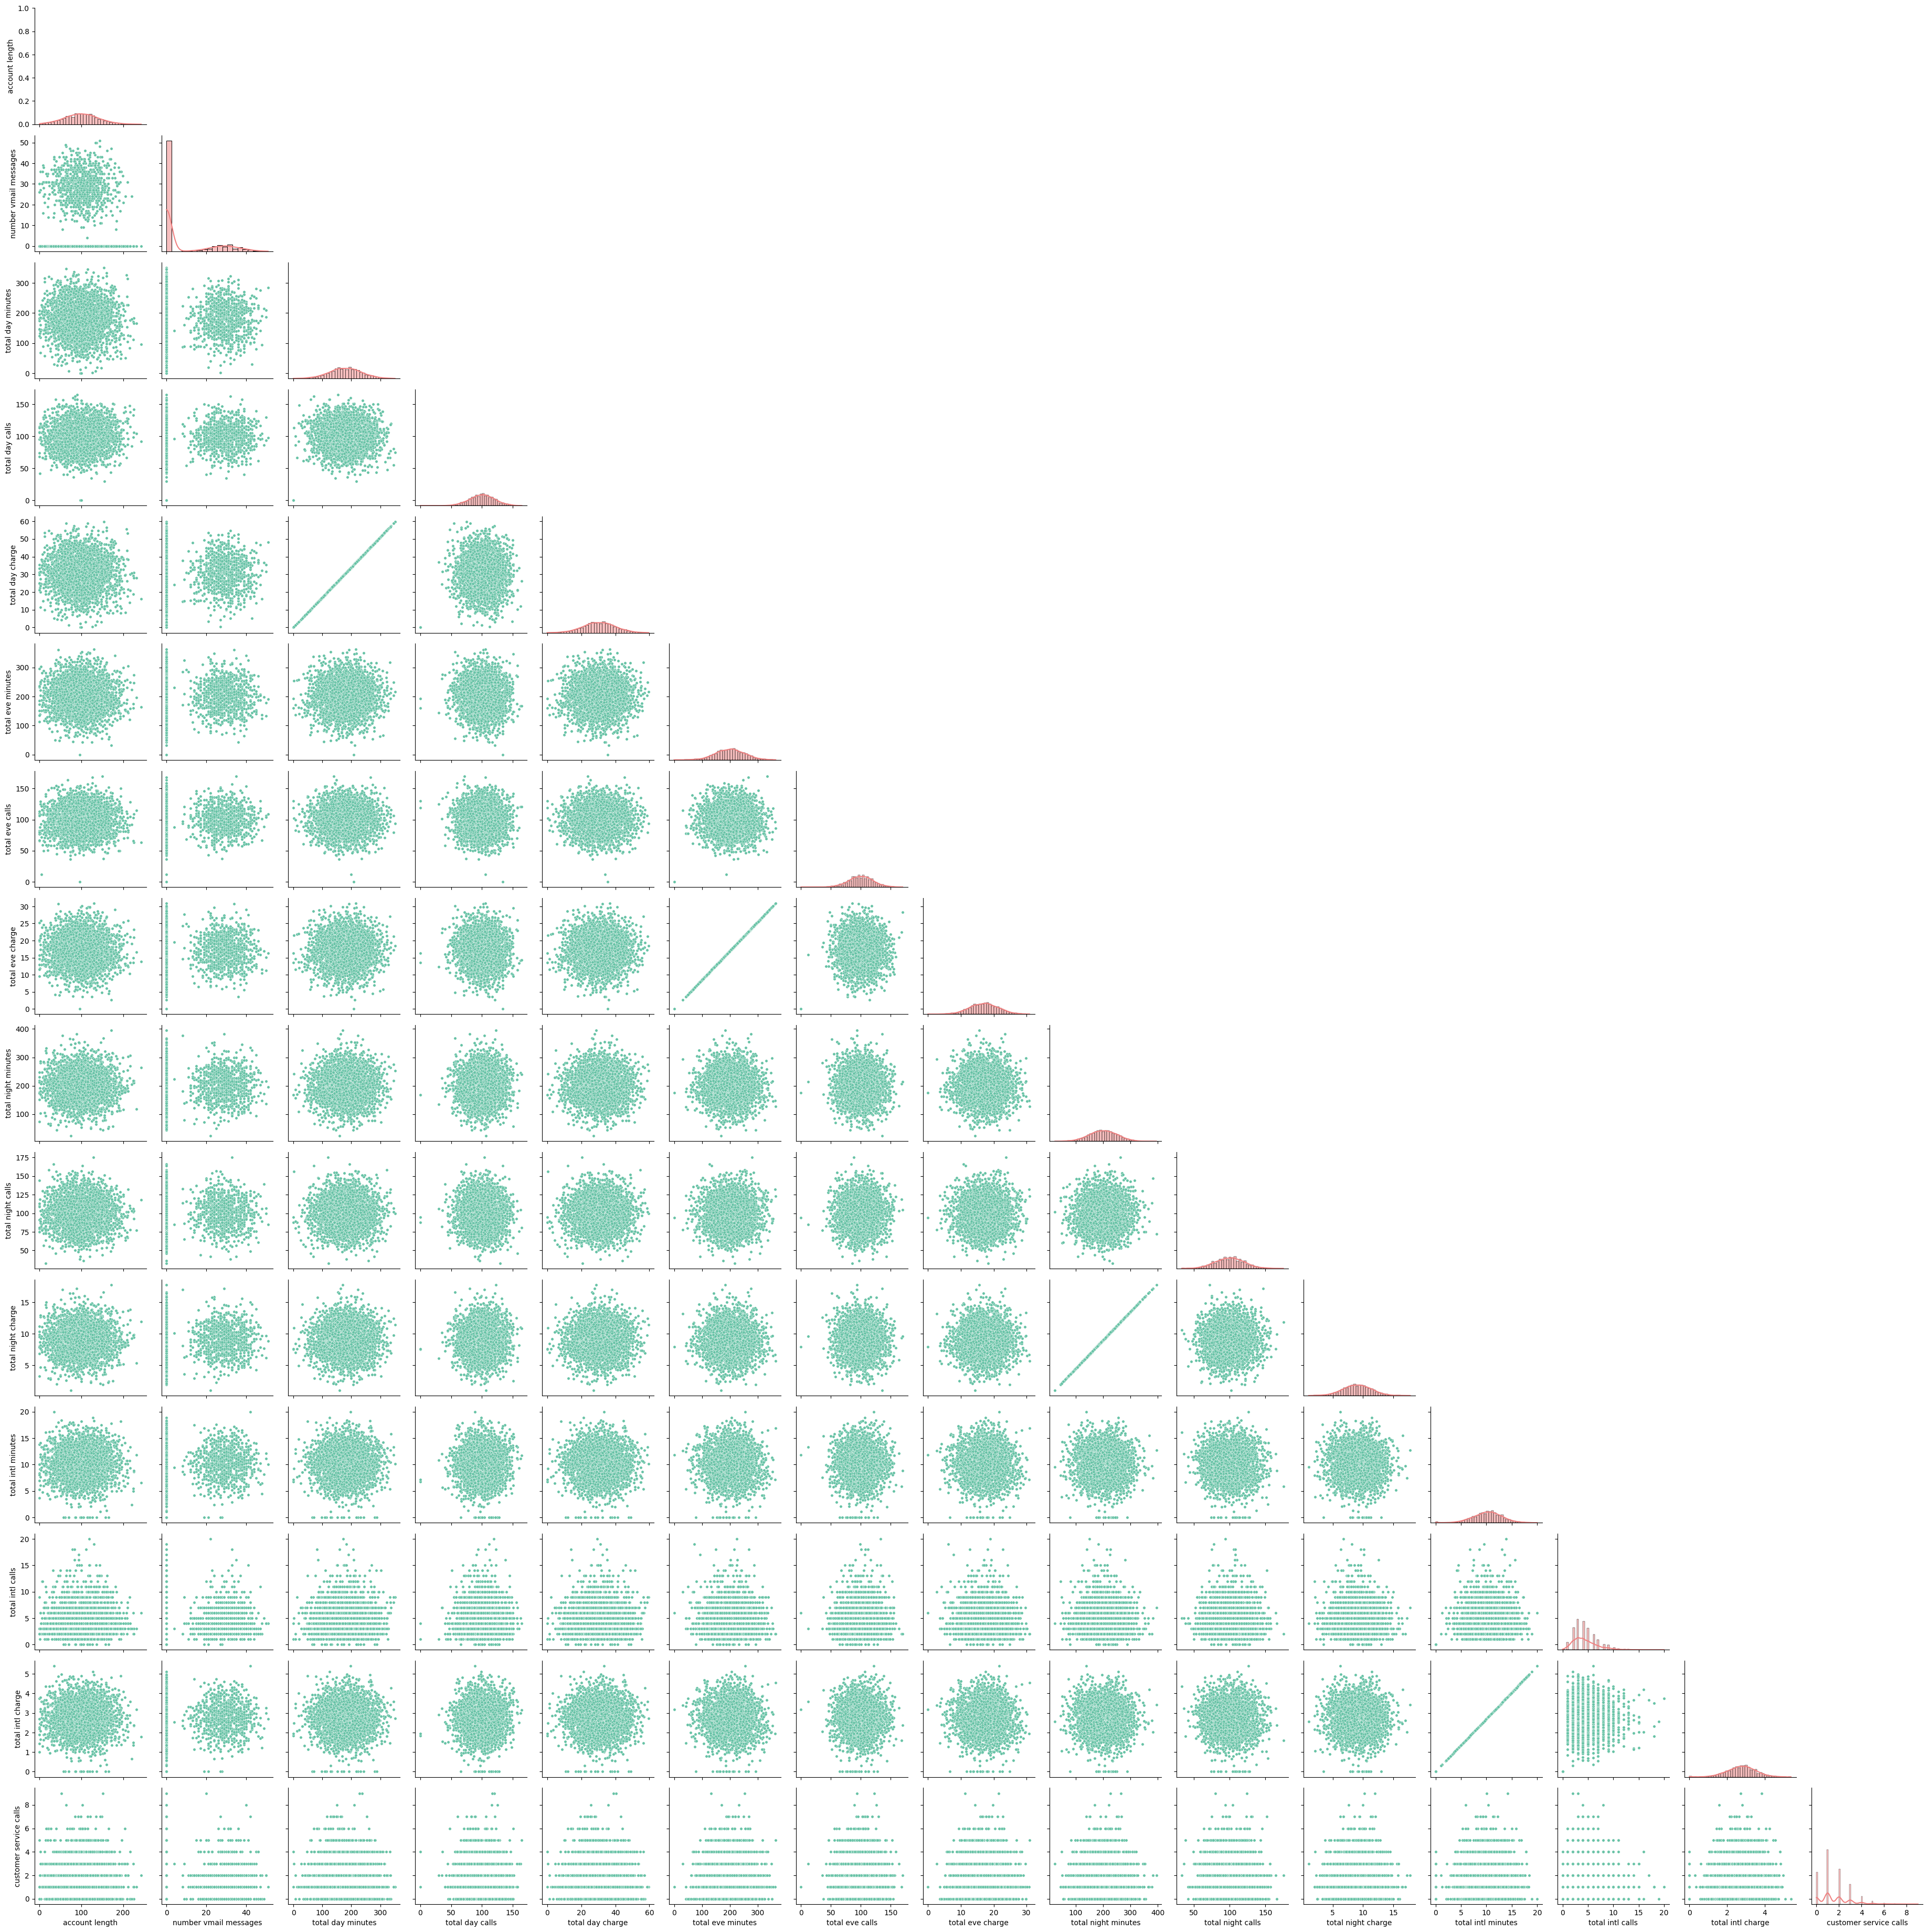

In [ ]:
# Pairplot for numerical features
palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 8))

def pairplot_diagram(data, variables):
  g = sns.PairGrid(data[variables])
  g.map_lower(sns.scatterplot, s=15, color=palette[0])
  g.map_diag(sns.histplot, color='lightcoral', kde=True)

  for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

pairplot_diagram(df, numerical_features)
plt.show()

## Association Matrix of Categorical Features

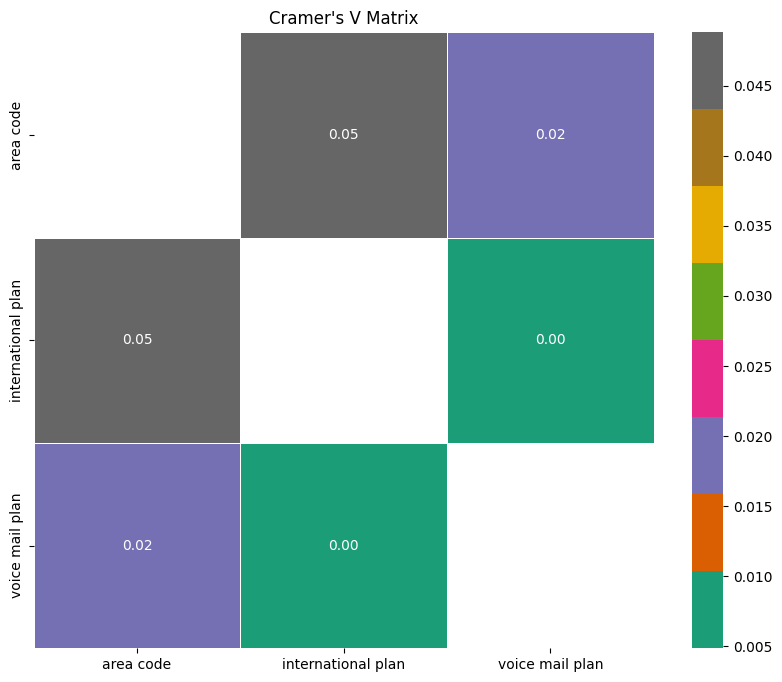

In [ ]:
# cramer's coefficient matrix
# create a contingency table and compute chi2 statistics
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x, y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  r, k = confusion_matrix.shape
  return np.sqrt(chi2 /  (n * (min(r,k) - 1)))

# construct and calculate cramer's V matrix
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))), index=categorical_features, columns=categorical_features)

for i in categorical_features:
  for j in categorical_features:
    if i != j:
      cramers_v_matrix.loc[i, j] = cramers_v(df[i], df[j])
    else:
      cramers_v_matrix.loc[i, j] = np.nan

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='Dark2', linewidths=0.5)
plt.title("Cramer's V Matrix")
plt.show()

## Correlation features with churn (target variable)

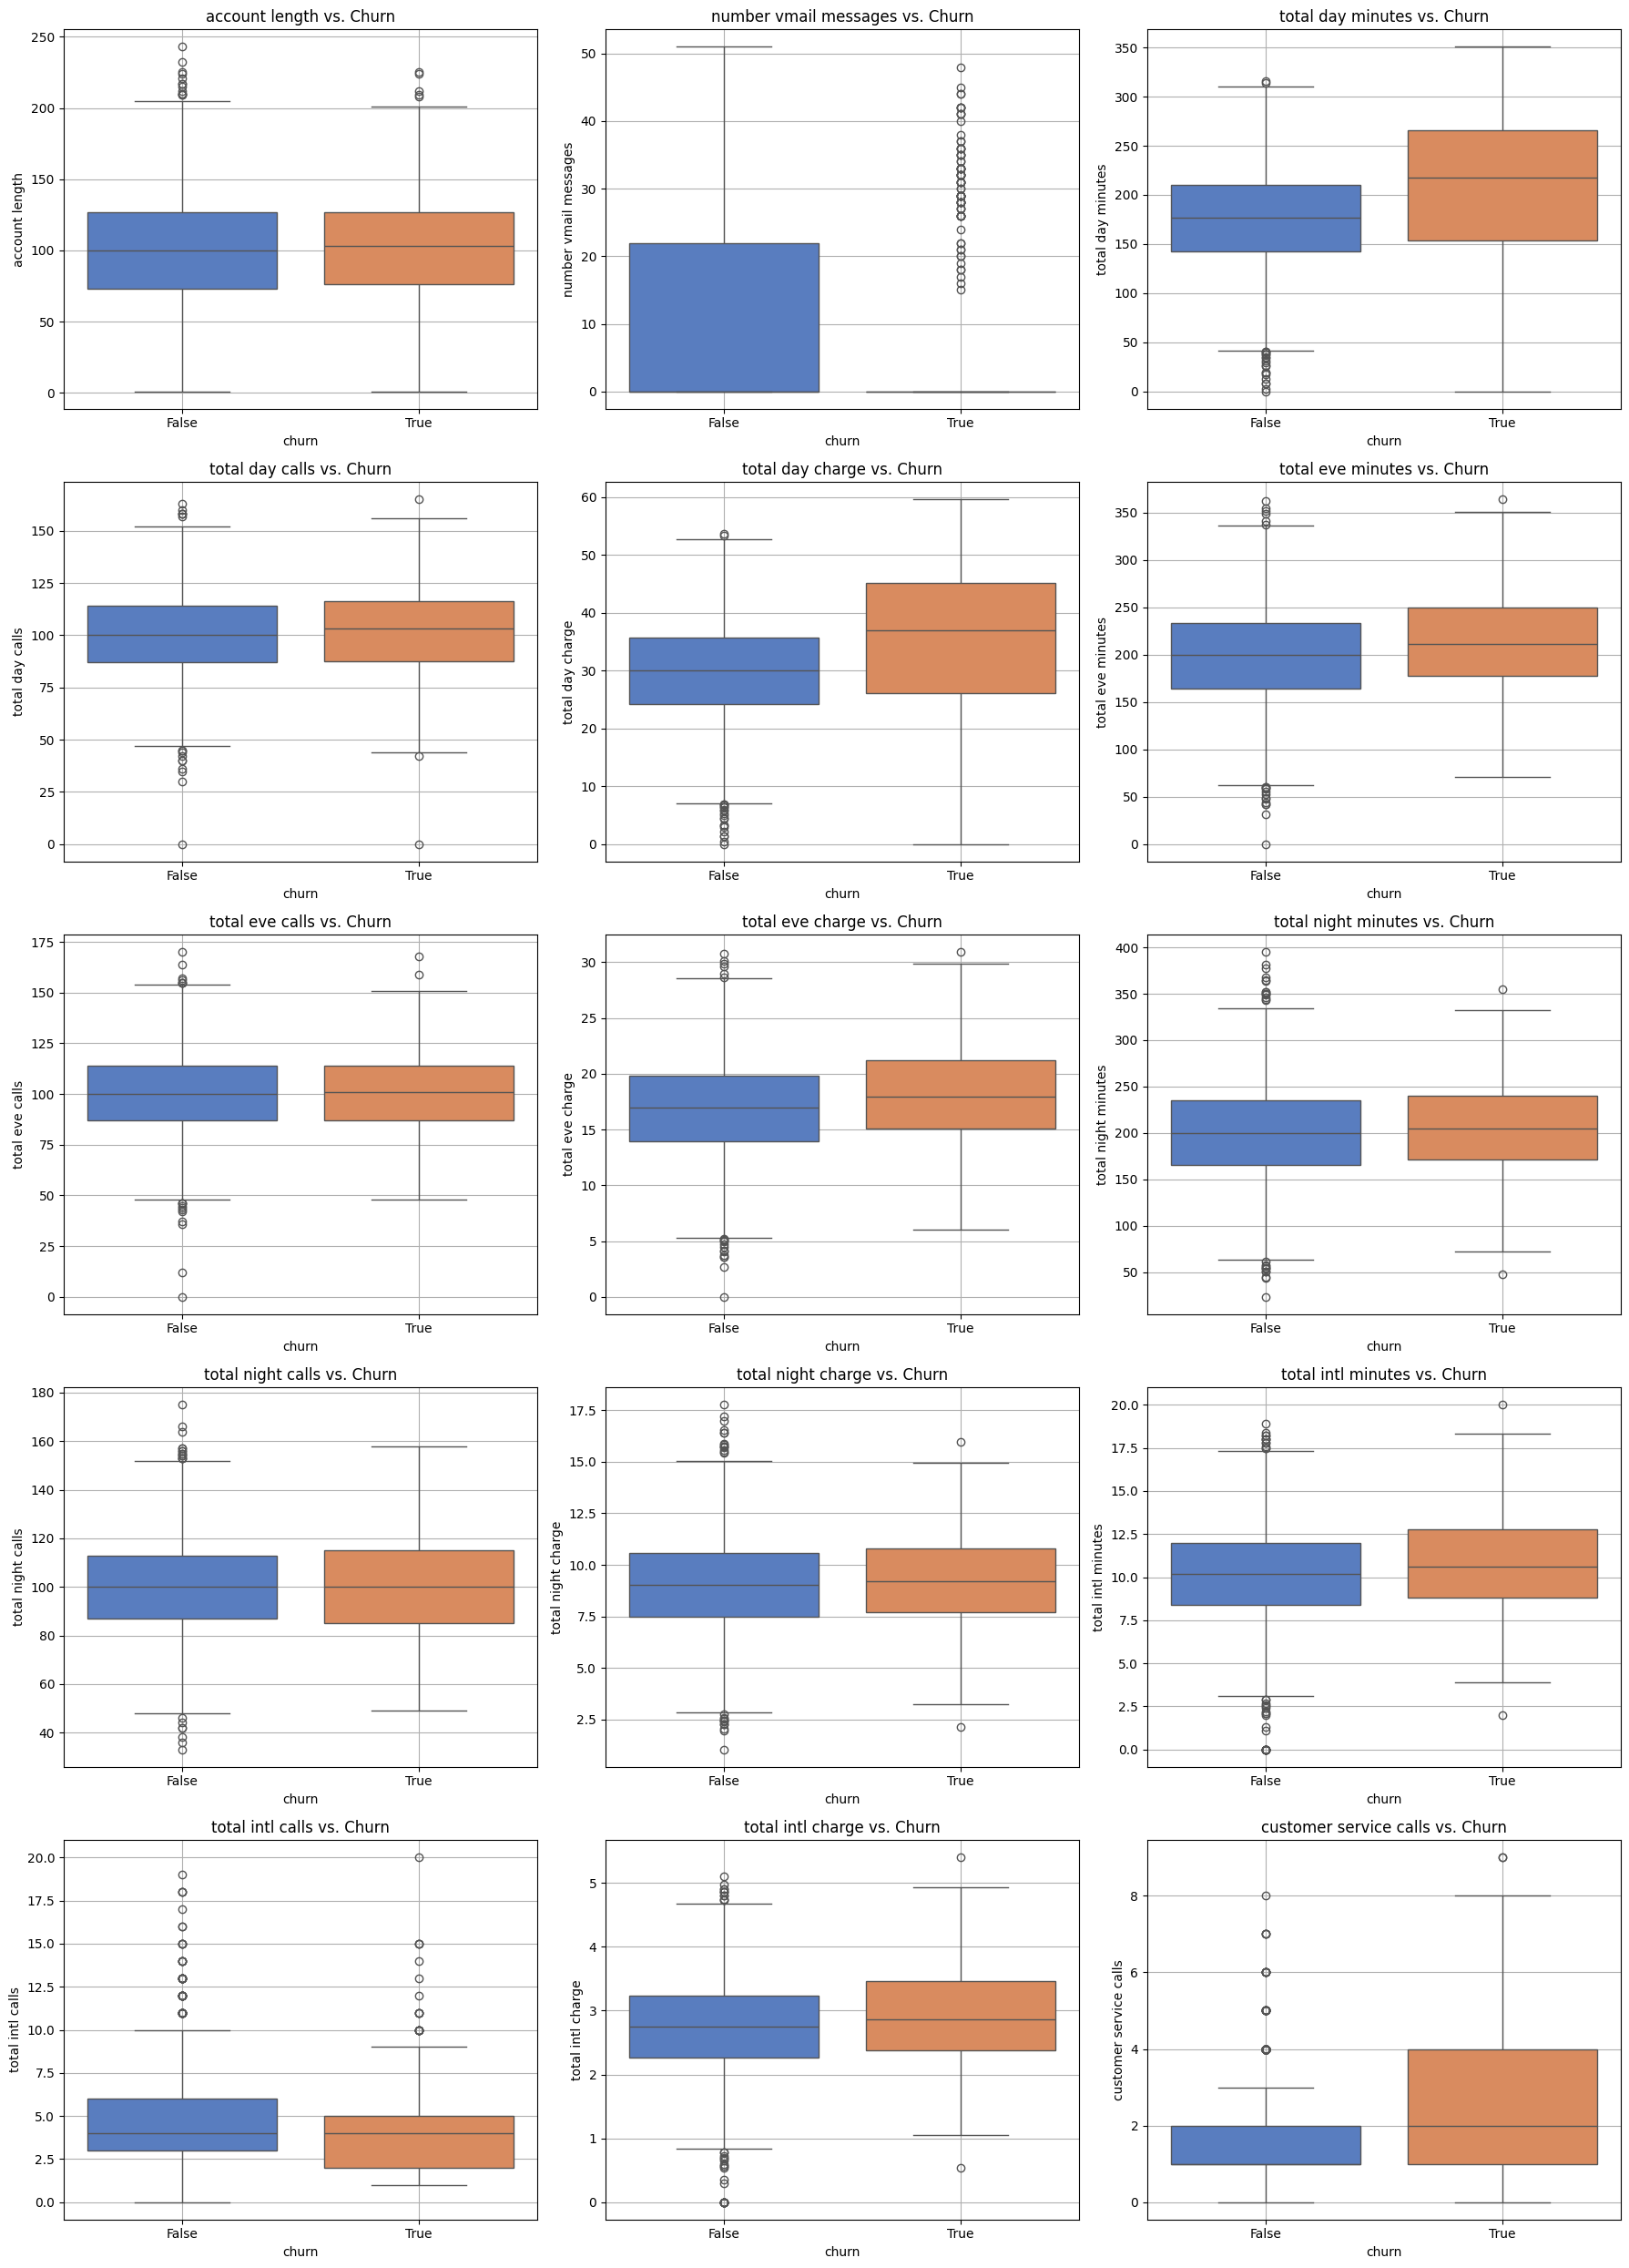

In [ ]:
# correlation of numerical features and churn
plt.figure(figsize=(18,25))
for i, col in enumerate(numerical_features):
  plt.subplot(5, 3, i+1)
  sns.boxplot(x='churn', y=col, data=df, palette='muted', hue='churn', legend=False)
  plt.title(f'{col} vs. Churn')
  plt.grid(True)

plt.tight_layout()
plt.show()

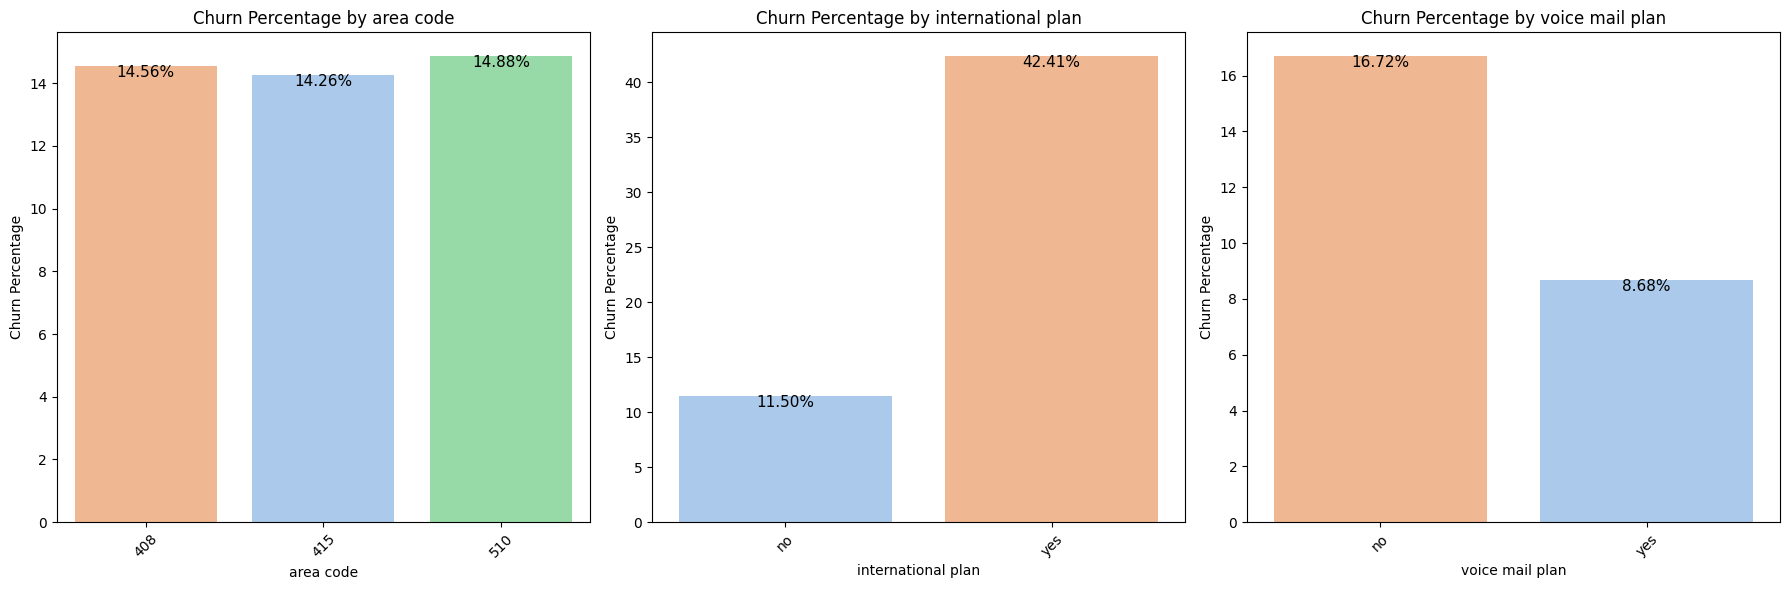

In [ ]:
# correlation of categorical features and churn
churn_col = 'churn'
plt.figure(figsize=(18,6))

for i, col in enumerate(categorical_features):
  plt.subplot(1, 3, i+1)

  #calculate churn counts for each category
  churn_counts = df.groupby(col)[churn_col].value_counts(normalize=True).unstack().fillna(0)

  #calculate churn percentage of true values
  churn_counts['churn_percentage'] = churn_counts[True] * 100

  #resetting index for plotting
  churn_counts = churn_counts.reset_index()

  # plotting graph
  ax = sns.barplot(x=col, y='churn_percentage', data=churn_counts, hue='churn_percentage', palette='pastel', legend=False)

  plt.title(f'Churn Percentage by {col}')
  plt.xlabel(col)
  plt.ylabel('Churn Percentage')
  plt.xticks(rotation=45)

  # adding percentage below the bars
  for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=11, color='black',
                    xytext=(0, -10), textcoords='offset points')

plt.tight_layout()
plt.show()

## Feature Engineering

Transform non-normally distributed features.
Out of 15 numerical features, 3 features are not distributed normally:
1. number vmail messages
2. total intl calls
3. customer service calls

**number vmail messages:** This distribution shows zero-inflation (72% values are 0) and 28% being normally distributed. Using binning method for uniform distribution.

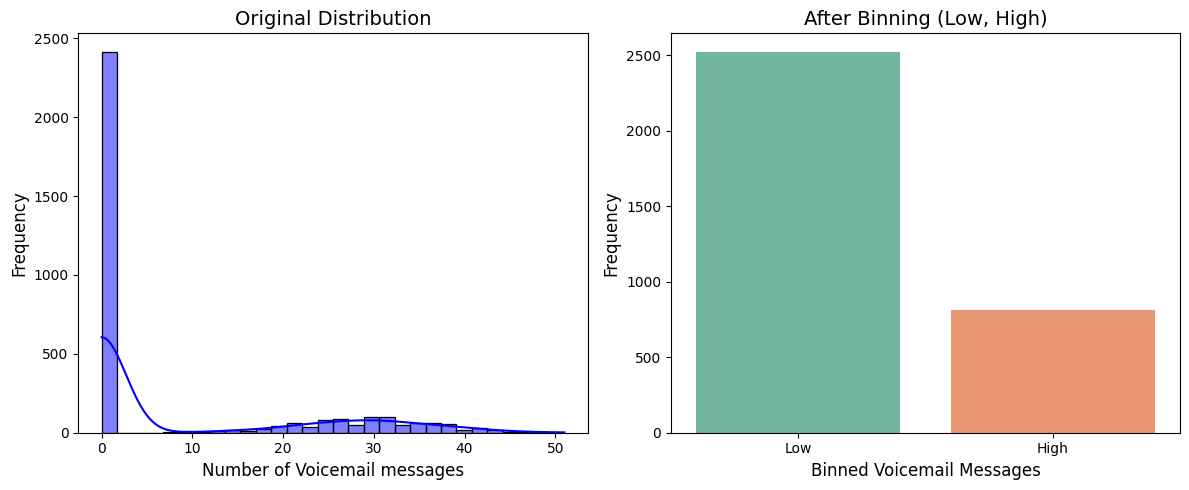

In [ ]:
# original distribution plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(df['number vmail messages'], kde=True, bins=30, color='blue')
plt.title('Original Distribution', fontsize=14)
plt.xlabel('Number of Voicemail messages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# binning the 'number of vmail messages' column into 2 bins : 0-20, 20-infinity
bins = [0, 21, np.inf]
labels = ['Low', 'High']
df['binned_voicemail'] = pd.cut(df['number vmail messages'], bins=bins, labels=labels, right=False)

# binned distribution plot
plt.subplot(1, 2, 2)
sns.countplot(x='binned_voicemail', data=df, palette='Set2', hue='binned_voicemail', legend=False)
plt.title('After Binning (Low, High)', fontsize=14)
plt.xlabel('Binned Voicemail Messages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**total intl calls:** original distribution is right skewed (positive skewness), multiple transformations can be used such as logarithmic transformation, square root transformation, box-cox transformation.

Using logarithmic transformation, particularly log(1+x) to avoid log 0 errors.

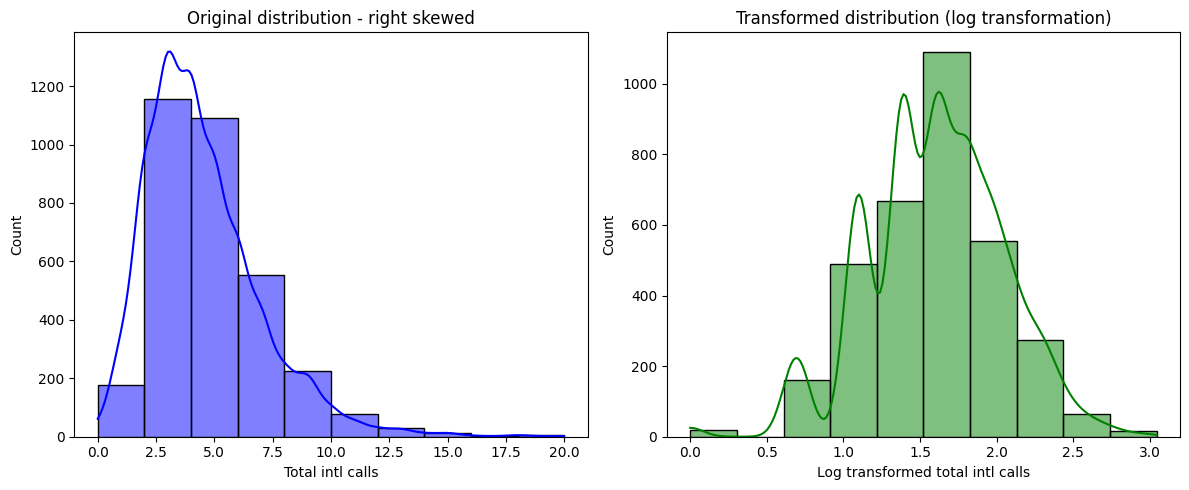

In [ ]:
# original distribution plot
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['total intl calls'], kde=True, bins=10, color='blue')
plt.title("Original distribution - right skewed")
plt.xlabel("Total intl calls")

# apply log transformation to reduce skewness
df['log_total_intl_calls'] = np.log1p(df['total intl calls'])

# log transformation distribution plot
plt.subplot(1, 2, 2)
sns.histplot(df['log_total_intl_calls'], kde=True, bins=10, color='green')
plt.title("Transformed distribution (log transformation)")
plt.xlabel("Log transformed total intl calls")

plt.tight_layout()
plt.show()

**customer service calls:**

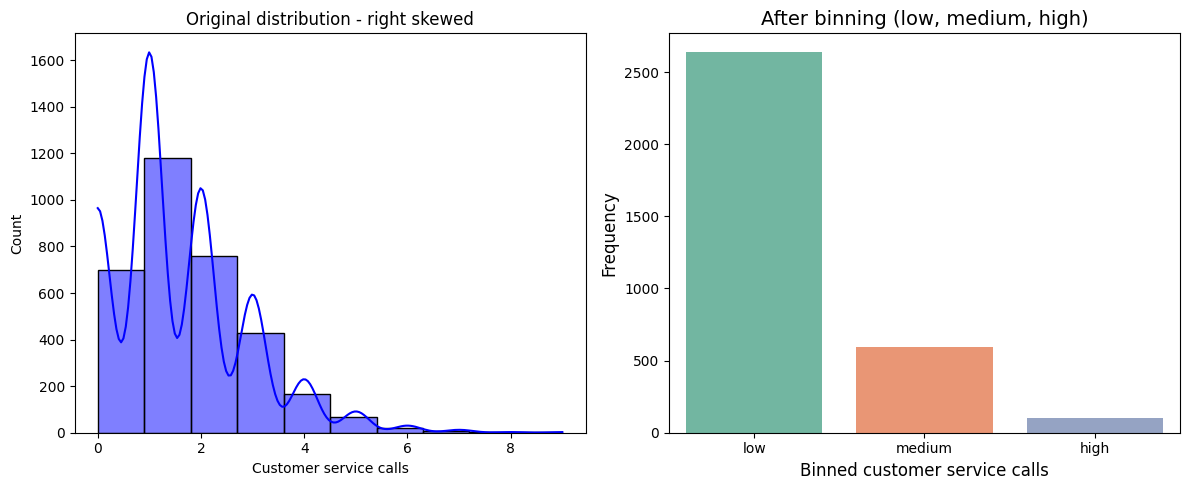

In [ ]:
# original distribution plot
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['customer service calls'], kde=True, bins=10, color='blue')
plt.title("Original distribution - right skewed")
plt.xlabel("Customer service calls")

# binning the customer service calls into 3 bins: 0-2, 3-4, 4+
bins = [0, 3, 5, np.inf]
labels = ['low', 'medium', 'high']
df['binned_customer_service_calls'] = pd.cut(df['customer service calls'], bins=bins, labels=labels, right=False)

# binned distribution plot
plt.subplot(1, 2, 2)
sns.countplot(x='binned_customer_service_calls', data=df, palette='Set2', hue='binned_customer_service_calls', legend=False)
plt.title("After binning (low, medium, high)", fontsize=14)
plt.xlabel("Binned customer service calls", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
df[['binned_customer_service_calls', 'customer service calls']].head()

binned_customer_service_calls  customer service calls
0                           low                       1
1                           low                       1
2                           low                       0
3                           low                       2
4                        medium                       3

In [ ]:
df.drop(columns=['number vmail messages', 'total intl calls', 'customer service calls'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   object  
 1   account length                 3333 non-null   int64   
 2   area code                      3333 non-null   object  
 3   international plan             3333 non-null   object  
 4   voice mail plan                3333 non-null   object  
 5   total day minutes              3333 non-null   float64 
 6   total day calls                3333 non-null   int64   
 7   total day charge               3333 non-null   float64 
 8   total eve minutes              3333 non-null   float64 
 9   total eve calls                3333 non-null   int64   
 10  total eve charge               3333 non-null   float64 
 11  total night minutes            3333 non-null   float64 
 12  total night calls              333

### Creating new columns

In [ ]:
df['total_day_charge_per_minute'] = df['total day charge'] / df['total day minutes']
df['total_eve_charge_per_minute'] = df['total eve charge'] / df['total eve minutes']
df['total_night_charge_per_minute'] = df['total night charge'] / df['total night minutes']
df['total_intl_charge_per_minute'] = df['total intl charge'] / df['total intl minutes']
df.head()

state  account length area code international plan voice mail plan  \
0    KS             128       415                 no             yes   
1    OH             107       415                 no             yes   
2    NJ             137       415                 no              no   
3    OH              84       408                yes              no   
4    OK              75       415                yes              no   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  ...  total intl minutes  total intl charge  churn  \
0               99  ...                10.0               2.70  False   
1              103  ...                13.7               3.70  False   
2              110  ...                12.2               3.29  False   
3               88  ...                 6.6               1.78  False   
4              122  ...                10.1               2.73  False   

   binned_voicemail  log_total_intl_calls  binned_customer_service_calls  \
0              High              1.386294                            low   
1              High              1.386294                            low   
2               Low              1.791759                            low   
3               Low              2.079442                            low   
4               Low              1.386294                         medium   

   total_day_charge_per_minute total_eve_charge_per_minute  \
0                     0.170011                    0.085005   
1                     0.169988                    0.085013   
2                     0.170008                    0.084983   
3                     0.170007                    0.084976   
4                     0.170006                    0.085030   

   total_night_charge_per_minute total_intl_charge_per_minute  
0                       0.044994                     0.270000  
1                       0.045008                     0.270073  
2                       0.045018                     0.269672  
3                       0.044997                     0.269697  
4                       0.044997                     0.270297  

[5 rows x 24 columns]

Train-test split

In [ ]:
split_then_scale = df[['total day minutes', 'total day calls']]
split_then_scale = split_then_scale.reset_index()
split_then_scale.head()

index  total day minutes  total day calls
0      0              265.1              110
1      1              161.6              123
2      2              243.4              114
3      3              299.4               71
4      4              166.7              113

In [ ]:
# Step 1: Train-test split
X_train, X_test = train_test_split(split_then_scale, test_size=0.2, random_state=42)

# Step 2: Fit the scaler on the training data
scaler = RobustScaler()
scale_columns = ['total day minutes', 'total day calls']
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
print(X_train.shape)
X_train.head()

(2666, 3)


index  total day minutes  total day calls
817     817          -1.145399        -0.346154
1373   1373          -0.919603         0.153846
679     679           0.591173        -0.884615
56       56          -0.715703        -0.115385
1993   1993           0.507698        -0.192308

In [ ]:
# Step 3: Apply the same transformation to the test data
X_test[scale_columns] = scaler.transform(X_test[scale_columns])
print(X_test.shape)
X_test.head()

(667, 3)


index  total day minutes  total day calls
438     438          -0.331167        -0.307692
2674   2674          -0.959288         0.615385
1345   1345          -2.452275        -3.884615
1957   1957           0.459802        -0.846154
2148   2148          -0.481697         0.038462

### Perform train-test split

In [ ]:
# Step 1: Define features (X) and target (Y)
X = df.drop(columns=['churn'])
y = df['churn']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (2666, 23)
Size of test set: (667, 23)


### Encoding categorical features

Direct Mapping

In [ ]:
df.select_dtypes(include=['object','category']).columns

Index(['state', 'area code', 'international plan', 'voice mail plan',
       'binned_voicemail', 'binned_customer_service_calls'],
      dtype='object')

In [ ]:
# 1. churn
y_train = y_train.map({True:1, False:0})
y_test = y_test.map({True:1, False:0})
y_train.head()

817     0
1373    1
679     1
56      0
1993    0
Name: churn, dtype: int64

In [ ]:
unique_values = df['international plan'].unique()
print(unique_values)
value_counts = df['international plan'].value_counts()
print(value_counts)

['no' 'yes']
international plan
no     3010
yes     323
Name: count, dtype: int64


In [ ]:
# 2. international plan
X_train['international plan'] = X_train['international plan'].map({'no': 0, 'yes': 1})
X_test['international plan'] = X_test['international plan'].map({'no': 0, 'yes': 1})
X_train.sample(10)

state  account length area code  international plan voice mail plan  \
1808    NH              83       415                   0              no   
2757    OK              35       415                   0              no   
1194    VT              48       510                   0              no   
2500    UT             121       415                   0             yes   
1011    NY              11       415                   0              no   
1601    AR              99       510                   1              no   
1360    HI              35       415                   0              no   
2885    HI             135       415                   0              no   
3100    MA              93       415                   0              no   
3213    WI              93       415                   0              no   

      total day minutes  total day calls  total day charge  total eve minutes  \
1808              231.3              100             39.32              210.4   
2757              179.2               59             30.46              283.3   
1194              188.4               63             32.03              165.9   
2500              215.5               95             36.64              241.8   
1011              143.4              130             24.38              289.4   
1601              242.3              102             41.19              350.9   
1360              124.2              102             21.11              123.9   
2885              190.9               44             32.45              161.4   
3100              173.0              131             29.41              190.4   
3213              152.1              141             25.86              215.5   

      total eve calls  ...  total night charge  total intl minutes  \
1808               84  ...                9.78                12.4   
2757              101  ...               12.84                 5.8   
1194               89  ...                9.26                13.2   
2500               92  ...                6.61                 9.6   
1011               50  ...                8.73                 9.7   
1601              102  ...                7.34                11.3   
1360              115  ...                6.11                13.1   
2885              109  ...               10.44                 8.4   
3100              108  ...               13.05                10.4   
3213              107  ...               11.81                12.0   

      total intl charge  binned_voicemail  log_total_intl_calls  \
1808               3.35               Low              1.098612   
2757               1.57               Low              2.079442   
1194               3.56               Low              1.098612   
2500               2.59              High              1.386294   
1011               2.62               Low              1.945910   
1601               3.05               Low              1.386294   
1360               3.54               Low              2.197225   
2885               2.27               Low              1.098612   
3100               2.81               Low              1.098612   
3213               3.24               Low              2.079442   

      binned_customer_service_calls total_day_charge_per_minute  \
1808                         medium                    0.169996   
2757                            low                    0.169978   
1194                            low                    0.170011   
2500                            low                    0.170023   
1011                            low                    0.170014   
1601                            low                    0.169996   
1360                            low                    0.169968   
2885                            low                    0.169984   
3100                            low                    0.170000   
3213                            low                    0.170020   

      total_eve_charge_per_mi

In [ ]:
# 3. voice mail plan
X_train['voice mail plan'] = X_train['voice mail plan'].map({'no': 0, 'yes': 1})
X_test['voice mail plan'] = X_test['voice mail plan'].map({'no': 0, 'yes': 1})
X_train.tail()

state  account length area code  international plan  voice mail plan  \
1095    ID             106       510                   0                0   
1130    PA             122       415                   0                0   
1294    OR              66       408                   0                0   
860     HI             169       415                   0                0   
3174    SC              36       408                   0                1   

      total day minutes  total day calls  total day charge  total eve minutes  \
1095              274.4              120             46.65              198.6   
1130               35.1               62              5.97              180.8   
1294               87.6               76             14.89              262.0   
860               179.2              111             30.46              175.2   
3174               29.9              123              5.08              129.1   

      total eve calls  ...  total night charge  total intl minutes  \
1095               82  ...                7.24                 6.0   
1130               89  ...               11.32                12.7   
1294              111  ...                8.31                 9.2   
860               130  ...               10.29                 9.9   
3174              117  ...               14.67                 8.6   

      total intl charge  binned_voicemail  log_total_intl_calls  \
1095               1.62               Low              1.386294   
1130               3.43               Low              1.098612   
1294               2.48               Low              1.791759   
860                2.67               Low              1.945910   
3174               2.32              High              1.945910   

      binned_customer_service_calls total_day_charge_per_minute  \
1095                            low                    0.170007   
1130                            low                    0.170085   
1294                            low                    0.169977   
860                             low                    0.169978   
3174                            low                    0.169900   

      total_eve_charge_per_minute total_night_charge_per_minute  \
1095                     0.084995                      0.045025   
1130                     0.085011                      0.044992   
1294                     0.085000                      0.045016   
860                      0.084989                      0.045013   
3174                     0.084973                      0.045014   

      total_intl_charge_per_minute  
1095                      0.270000  
1130                      0.270079  
1294                      0.269565  
860                       0.269697  
3174                      0.269767  

[5 rows x 23 columns]

Frequency encoding

In [ ]:
# 4. area code
pd.concat([X_train['area code'], y_train], axis=1).groupby('area code').agg(churn_rate=('churn', 'mean'))

churn_rate
area code            
408          0.134021
415          0.138113
510          0.163142

In [ ]:
X_train['area code'].value_counts(normalize=True)

area code
415    0.496999
408    0.254689
510    0.248312
Name: proportion, dtype: float64

In [ ]:
# Step 1: calculate frequency encoding based on the training set
freq_encoding_area_code = X_train['area code'].value_counts(normalize=True)

# Step 2: apply frequency encoding to both training and test sets
X_train['area code'] = X_train['area code'].map(freq_encoding_area_code)
X_test['area code'] = X_test['area code'].map(freq_encoding_area_code)

X_train.head()

state  account length  area code  international plan  voice mail plan  \
817     UT             243   0.248312                   0                0   
1373    SC             108   0.496999                   0                0   
679     TX              75   0.496999                   1                0   
56      CO             141   0.496999                   0                0   
1993    IN              86   0.248312                   0                0   

      total day minutes  total day calls  total day charge  total eve minutes  \
817                95.5               92             16.24              163.7   
1373              112.0              105             19.04              193.7   
679               222.4               78             37.81              327.0   
56                126.9               98             21.57              180.0   
1993              216.3               96             36.77              266.3   

      total eve calls  ...  total night charge  total intl minutes  \
817                63  ...               11.89                 6.6   
1373              110  ...                9.40                 4.1   
679               111  ...                9.36                 8.7   
56                 62  ...                6.34                 8.0   
1993               77  ...                9.63                 4.5   

      total intl charge  binned_voicemail  log_total_intl_calls  \
817                1.78               Low              1.945910   
1373               1.11               Low              1.609438   
679                2.35               Low              2.302585   
56                 2.16               Low              1.098612   
1993               1.22               Low              1.386294   

      binned_customer_service_calls total_day_charge_per_minute  \
817                             low                    0.170052   
1373                         medium                    0.170000   
679                             low                    0.170009   
56                              low                    0.169976   
1993                            low                    0.169995   

      total_eve_charge_per_minute total_night_charge_per_minute  \
817                      0.084973                      0.045004   
1373                     0.084977                      0.044998   
679                      0.085015                      0.045000   
56                       0.085000                      0.045028   
1993                     0.085017                      0.045000   

      total_intl_charge_per_minute  
817                       0.269697  
1373                      0.270732  
679                       0.270115  
56                        0.270000  
1993                      0.271111  

[5 rows x 23 columns]

Target encoding

In [ ]:
# 5. state
pd.concat([X_train['state'], y_train], axis=1).groupby('state').agg(churn_rate=('churn', 'mean')).sort_values(by='churn_rate', ascending=False)

churn_rate
state            
TX       0.271186
AR       0.268293
NJ       0.264151
SC       0.255319
NV       0.250000
KS       0.226415
CA       0.222222
MD       0.220339
ME       0.208333
PA       0.200000
MI       0.200000
MS       0.195652
MN       0.188406
GA       0.186047
MT       0.181818
WA       0.175439
IN       0.173077
NC       0.169811
OR       0.169492
NY       0.153846
KY       0.148936
MA       0.148148
NH       0.146341
OK       0.142857
OH       0.134328
CT       0.133333
WY       0.131148
CO       0.122807
UT       0.120690
FL       0.120000
DE       0.117647
NM       0.115385
SD       0.115385
TN       0.113636
WV       0.107143
ID       0.107143
WI       0.102941
NE       0.102564
DC       0.097561
MO       0.096154
IL       0.090909
VA       0.080645
IA       0.078947
RI       0.074074
AK       0.069767
LA       0.068182
AL       0.064516
HI       0.063830
AZ       0.056604
VT       0.054545
ND       0.041667

In [ ]:
# Step 1: Calculate frequency encoding based on the training set
target_encoding_state = pd.concat([X_train['state'], y_train], axis=1).groupby('state').agg(churn_rate=('churn', 'mean'))
target_encoding_state = target_encoding_state['churn_rate'].to_dict()

# Step 2: Apply target encoding to both training and test sets
X_train['state'] = X_train['state'].map(target_encoding_state)
X_test['state'] = X_test['state'].map(target_encoding_state)

X_train.head()

state  account length  area code  international plan  \
817   0.120690             243   0.248312                   0   
1373  0.255319             108   0.496999                   0   
679   0.271186              75   0.496999                   1   
56    0.122807             141   0.496999                   0   
1993  0.173077              86   0.248312                   0   

      voice mail plan  total day minutes  total day calls  total day charge  \
817                 0               95.5               92             16.24   
1373                0              112.0              105             19.04   
679                 0              222.4               78             37.81   
56                  0              126.9               98             21.57   
1993                0              216.3               96             36.77   

      total eve minutes  total eve calls  ...  total night charge  \
817               163.7               63  ...               11.89   
1373              193.7              110  ...                9.40   
679               327.0              111  ...                9.36   
56                180.0               62  ...                6.34   
1993              266.3               77  ...                9.63   

      total intl minutes  total intl charge  binned_voicemail  \
817                  6.6               1.78               Low   
1373                 4.1               1.11               Low   
679                  8.7               2.35               Low   
56                   8.0               2.16               Low   
1993                 4.5               1.22               Low   

      log_total_intl_calls  binned_customer_service_calls  \
817               1.945910                            low   
1373              1.609438                         medium   
679               2.302585                            low   
56                1.098612                            low   
1993              1.386294                            low   

     total_day_charge_per_minute  total_eve_charge_per_minute  \
817                     0.170052                     0.084973   
1373                    0.170000                     0.084977   
679                     0.170009                     0.085015   
56                      0.169976                     0.085000   
1993                    0.169995                     0.085017   

     total_night_charge_per_minute  total_intl_charge_per_minute  
817                       0.045004                      0.269697  
1373                      0.044998                      0.270732  
679                       0.045000                      0.270115  
56                        0.045028                      0.270000  
1993                      0.045000                      0.271111  

[5 rows x 23 columns]

In [ ]:
# binned voicemail
pd.concat([X_train['binned_voicemail'], y_train], axis=1).groupby('binned_voicemail', observed=True).agg(churn_rate=('churn', 'mean'))

churn_rate
binned_voicemail            
Low                 0.161402
High                0.085938

In [ ]:
# Step 1: calculate target encoding based on the target set
target_encoding_binned_voicemail = pd.concat([X_train['binned_voicemail'], y_train], axis=1).groupby('binned_voicemail', observed=True).agg(churn_rate=('churn', 'mean'))

# Step 2: Map the churn rate back to the training and tests set
X_train['binned_voicemail'] = X_train['binned_voicemail'].map(target_encoding_binned_voicemail['churn_rate']).astype(float)
X_test['binned_voicemail'] = X_test['binned_voicemail'].map(target_encoding_binned_voicemail['churn_rate']).astype(float)

X_train.head()

state  account length  area code  international plan  \
817   0.120690             243   0.248312                   0   
1373  0.255319             108   0.496999                   0   
679   0.271186              75   0.496999                   1   
56    0.122807             141   0.496999                   0   
1993  0.173077              86   0.248312                   0   

      voice mail plan  total day minutes  total day calls  total day charge  \
817                 0               95.5               92             16.24   
1373                0              112.0              105             19.04   
679                 0              222.4               78             37.81   
56                  0              126.9               98             21.57   
1993                0              216.3               96             36.77   

      total eve minutes  total eve calls  ...  total night charge  \
817               163.7               63  ...               11.89   
1373              193.7              110  ...                9.40   
679               327.0              111  ...                9.36   
56                180.0               62  ...                6.34   
1993              266.3               77  ...                9.63   

      total intl minutes  total intl charge  binned_voicemail  \
817                  6.6               1.78          0.161402   
1373                 4.1               1.11          0.161402   
679                  8.7               2.35          0.161402   
56                   8.0               2.16          0.161402   
1993                 4.5               1.22          0.161402   

      log_total_intl_calls  binned_customer_service_calls  \
817               1.945910                            low   
1373              1.609438                         medium   
679               2.302585                            low   
56                1.098612                            low   
1993              1.386294                            low   

      total_day_charge_per_minute  total_eve_charge_per_minute  \
817                      0.170052                     0.084973   
1373                     0.170000                     0.084977   
679                      0.170009                     0.085015   
56                       0.169976                     0.085000   
1993                     0.169995                     0.085017   

     total_night_charge_per_minute  total_intl_charge_per_minute  
817                       0.045004                      0.269697  
1373                      0.044998                      0.270732  
679                       0.045000                      0.270115  
56                        0.045028                      0.270000  
1993                      0.045000                      0.271111  

[5 rows x 23 columns]

In [ ]:
# 7. binned customer service calls
pd.concat([X_train['binned_customer_service_calls'], y_train], axis=1).groupby('binned_customer_service_calls', observed=True).agg(churn_rate=('churn', 'mean'))

churn_rate
binned_customer_service_calls            
low                              0.111376
medium                           0.197895
high                             0.600000

In [ ]:
# Step 1: Calculate target encoding based on the training set
target_encoding_binned_csc = pd.concat([X_train['binned_customer_service_calls'], y_train], axis=1).groupby('binned_customer_service_calls', observed=True).agg(churn_rate=('churn', 'mean'))

# Step 2: Map the churn rate back to the training and tests set
X_train['binned_customer_service_calls'] = X_train['binned_customer_service_calls'].map(target_encoding_binned_csc['churn_rate']).astype(float)
X_test['binned_customer_service_calls'] = X_test['binned_customer_service_calls'].map(target_encoding_binned_csc['churn_rate']).astype(float)

X_train.head()

state  account length  area code  international plan  \
817   0.120690             243   0.248312                   0   
1373  0.255319             108   0.496999                   0   
679   0.271186              75   0.496999                   1   
56    0.122807             141   0.496999                   0   
1993  0.173077              86   0.248312                   0   

      voice mail plan  total day minutes  total day calls  total day charge  \
817                 0               95.5               92             16.24   
1373                0              112.0              105             19.04   
679                 0              222.4               78             37.81   
56                  0              126.9               98             21.57   
1993                0              216.3               96             36.77   

      total eve minutes  total eve calls  ...  total night charge  \
817               163.7               63  ...               11.89   
1373              193.7              110  ...                9.40   
679               327.0              111  ...                9.36   
56                180.0               62  ...                6.34   
1993              266.3               77  ...                9.63   

      total intl minutes  total intl charge  binned_voicemail  \
817                  6.6               1.78          0.161402   
1373                 4.1               1.11          0.161402   
679                  8.7               2.35          0.161402   
56                   8.0               2.16          0.161402   
1993                 4.5               1.22          0.161402   

      log_total_intl_calls  binned_customer_service_calls  \
817               1.945910                       0.111376   
1373              1.609438                       0.197895   
679               2.302585                       0.111376   
56                1.098612                       0.111376   
1993              1.386294                       0.111376   

      total_day_charge_per_minute  total_eve_charge_per_minute  \
817                      0.170052                     0.084973   
1373                     0.170000                     0.084977   
679                      0.170009                     0.085015   
56                       0.169976                     0.085000   
1993                     0.169995                     0.085017   

      total_night_charge_per_minute  total_intl_charge_per_minute  
817                        0.045004                      0.269697  
1373                       0.044998                      0.270732  
679                        0.045000                      0.270115  
56                         0.045028                      0.270000  
1993                       0.045000                      0.271111  

[5 rows x 23 columns]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 817 to 3174
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          2666 non-null   float64
 1   account length                 2666 non-null   int64  
 2   area code                      2666 non-null   float64
 3   international plan             2666 non-null   int64  
 4   voice mail plan                2666 non-null   int64  
 5   total day minutes              2666 non-null   float64
 6   total day calls                2666 non-null   int64  
 7   total day charge               2666 non-null   float64
 8   total eve minutes              2666 non-null   float64
 9   total eve calls                2666 non-null   int64  
 10  total eve charge               2666 non-null   float64
 11  total night minutes            2666 non-null   float64
 12  total night calls              2666 non-null   int6

### Scaling Numerical Features

In [ ]:
exclude_columns = ['state', 'area code', 'international plan', 'voice mail plan',
                    'binned_voicemail', 'binned_customer_service_calls', 'total_day_charge_per_minute',
                    'total_eve_charge_per_minute', 'total_night_charge_per_minute',
                    'total_intl_charge_per_minute']
columns_to_scale = X_train.columns.difference(exclude_columns)

# apply robust scaler
scaler = RobustScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_train.head()

state  account length  area code  international plan  \
817   0.120690        2.648148   0.248312                   0   
1373  0.255319        0.148148   0.496999                   0   
679   0.271186       -0.462963   0.496999                   1   
56    0.122807        0.759259   0.496999                   0   
1993  0.173077       -0.259259   0.248312                   0   

      voice mail plan  total day minutes  total day calls  total day charge  \
817                 0          -1.145399        -0.346154         -1.144467   
1373                0          -0.919603         0.153846         -0.919115   
679                 0           0.591173        -0.884615          0.591549   
56                  0          -0.715703        -0.115385         -0.715493   
1993                0           0.507698        -0.192308          0.507847   

      total eve minutes  total eve calls  ...  total night charge  \
817           -0.539775        -1.423077  ...            0.925325   
1373          -0.103887         0.384615  ...            0.116883   
679            1.832910         0.423077  ...            0.103896   
56            -0.302942        -1.461538  ...           -0.876623   
1993           0.950963        -0.884615  ...            0.191558   

      total intl minutes  total intl charge  binned_voicemail  \
817            -1.057143          -1.063830          0.161402   
1373           -1.771429          -1.776596          0.161402   
679            -0.457143          -0.457447          0.161402   
56             -0.657143          -0.659574          0.161402   
1993           -1.657143          -1.659574          0.161402   

      log_total_intl_calls  binned_customer_service_calls  \
817               0.601256                       0.111376   
1373              0.000000                       0.197895   
679               1.238613                       0.111376   
56               -0.912815                       0.111376   
1993             -0.398744                       0.111376   

      total_day_charge_per_minute  total_eve_charge_per_minute  \
817                      0.170052                     0.084973   
1373                     0.170000                     0.084977   
679                      0.170009                     0.085015   
56                       0.169976                     0.085000   
1993                     0.169995                     0.085017   

      total_night_charge_per_minute  total_intl_charge_per_minute  
817                        0.045004                      0.269697  
1373                       0.044998                      0.270732  
679                        0.045000                      0.270115  
56                         0.045028                      0.270000  
1993                       0.045000                      0.271111  

[5 rows x 23 columns]

## Feature Selection
Removes highly correlated features

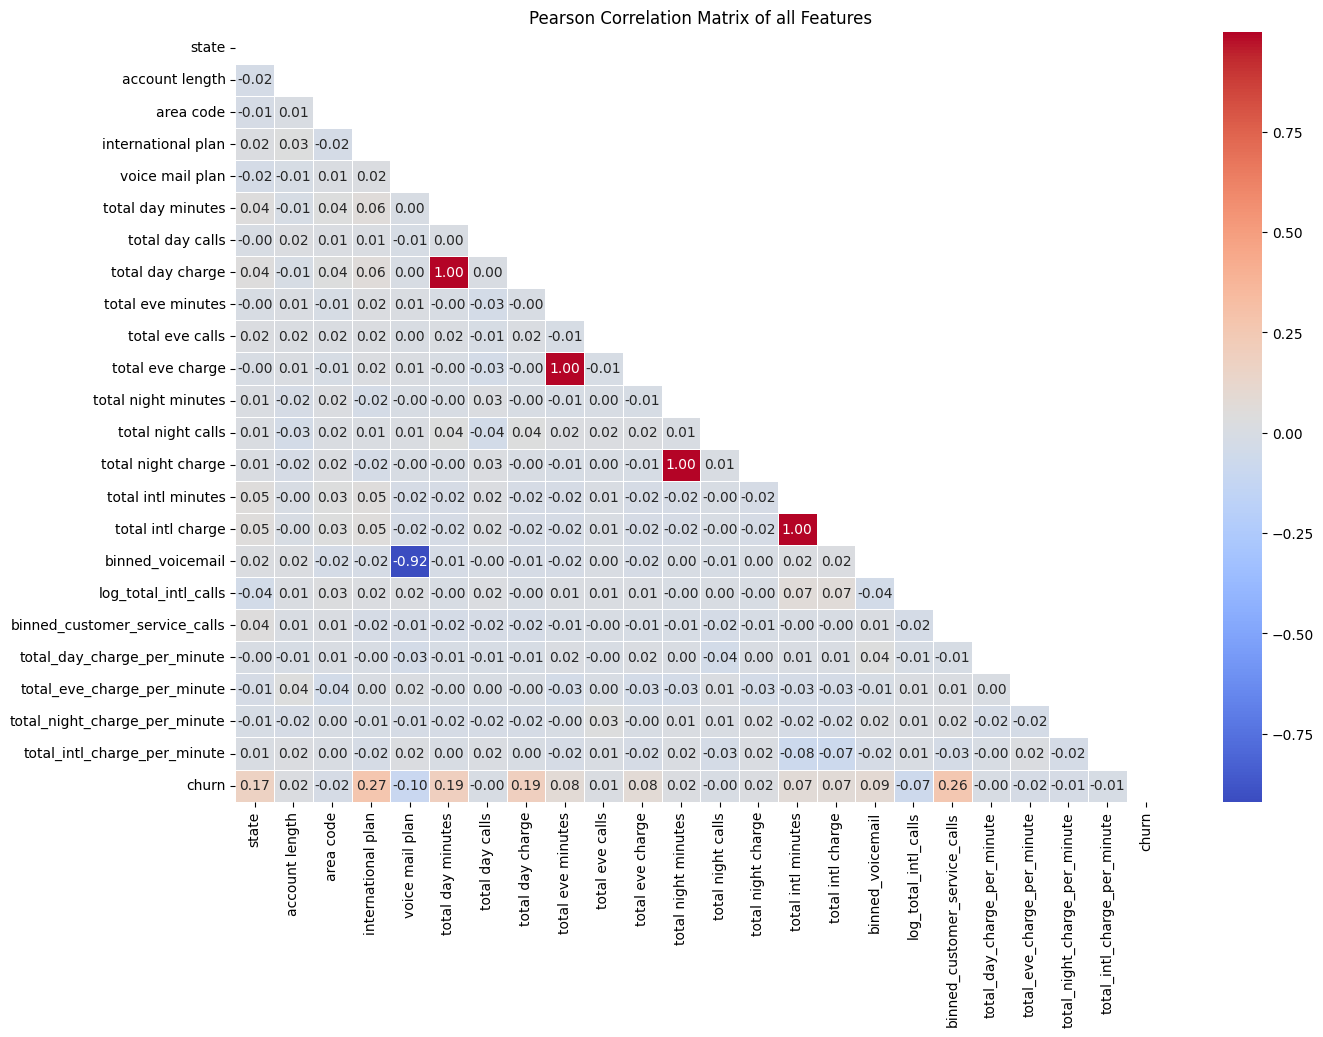

In [ ]:
pearson_correlation_matrix = pd.concat([X_train, y_train], axis=1).corr(method='pearson')

mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"fontsize": 10}, mask=mask)
plt.title('Pearson Correlation Matrix of all Features')
plt.show()

### Feature importance from models
Tree based models such as Random forest, Gradiant boosting, or XGBoost

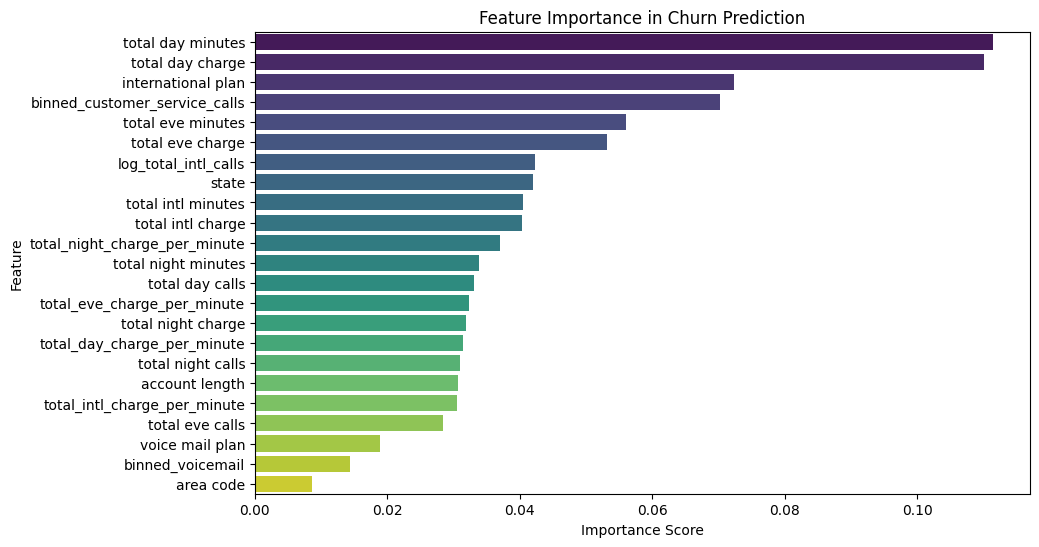

In [ ]:
# create and fit the random forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# get feature importance
importance = rf_model.feature_importances_

# create dataframe for feature importance and sort features
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : importance
}).sort_values(by='Importance', ascending=False)

# plotting feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data = feature_importance_df, palette='viridis', hue='Feature')
plt.title('Feature Importance in Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Redundancy consideration variability

In [ ]:
variance = X_train.var()
variance.sort_values(ascending=False)


total intl charge                6.453948e-01
total intl minutes               6.386005e-01
log_total_intl_calls             6.126593e-01
total eve calls                  5.966231e-01
total day calls                  5.850182e-01
total day minutes                5.531940e-01
total day charge                 5.529916e-01
total night charge               5.489430e-01
total night minutes              5.464412e-01
total eve minutes                5.425107e-01
total eve charge                 5.420667e-01
account length                   5.356705e-01
total night calls                5.240170e-01
voice mail plan                  1.980643e-01
international plan               8.713900e-02
area code                        1.507269e-02
binned_customer_service_calls    8.378535e-03
state                            3.624166e-03
binned_voicemail                 1.039309e-03
total_intl_charge_per_minute     1.089642e-07
total_day_charge_per_minute      7.776111e-10
total_night_charge_per_minute    2.816371e-10
total_eve_charge_per_minute      2.647482e-10
dtype: float64

In [ ]:
# drop least variance columns
columns_to_drop = ['total intl minutes', 'total day minutes', 'total eve minutes',
                   'total night minutes', 'binned_voicemail', 'total_intl_charge_per_minute',
                   'total_day_charge_per_minute', 'total_night_charge_per_minute',
                   'total_eve_charge_per_minute']

X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)
X_train.head()

state  account length  area code  international plan  \
817   0.120690        2.648148   0.248312                   0   
1373  0.255319        0.148148   0.496999                   0   
679   0.271186       -0.462963   0.496999                   1   
56    0.122807        0.759259   0.496999                   0   
1993  0.173077       -0.259259   0.248312                   0   

      voice mail plan  total day calls  total day charge  total eve calls  \
817                 0        -0.346154         -1.144467        -1.423077   
1373                0         0.153846         -0.919115         0.384615   
679                 0        -0.884615          0.591549         0.423077   
56                  0        -0.115385         -0.715493        -1.461538   
1993                0        -0.192308          0.507847        -0.884615   

      total eve charge  total night calls  total night charge  \
817          -0.540795           0.666667            0.925325   
1373         -0.105083          -0.259259            0.116883   
679           1.832550           0.148148            0.103896   
56           -0.303289           1.037037           -0.876623   
1993          0.950876           0.370370            0.191558   

      total intl charge  log_total_intl_calls  binned_customer_service_calls  
817           -1.063830              0.601256                       0.111376  
1373          -1.776596              0.000000                       0.197895  
679           -0.457447              1.238613                       0.111376  
56            -0.659574             -0.912815                       0.111376  
1993          -1.659574             -0.398744                       0.111376

## Balance the class

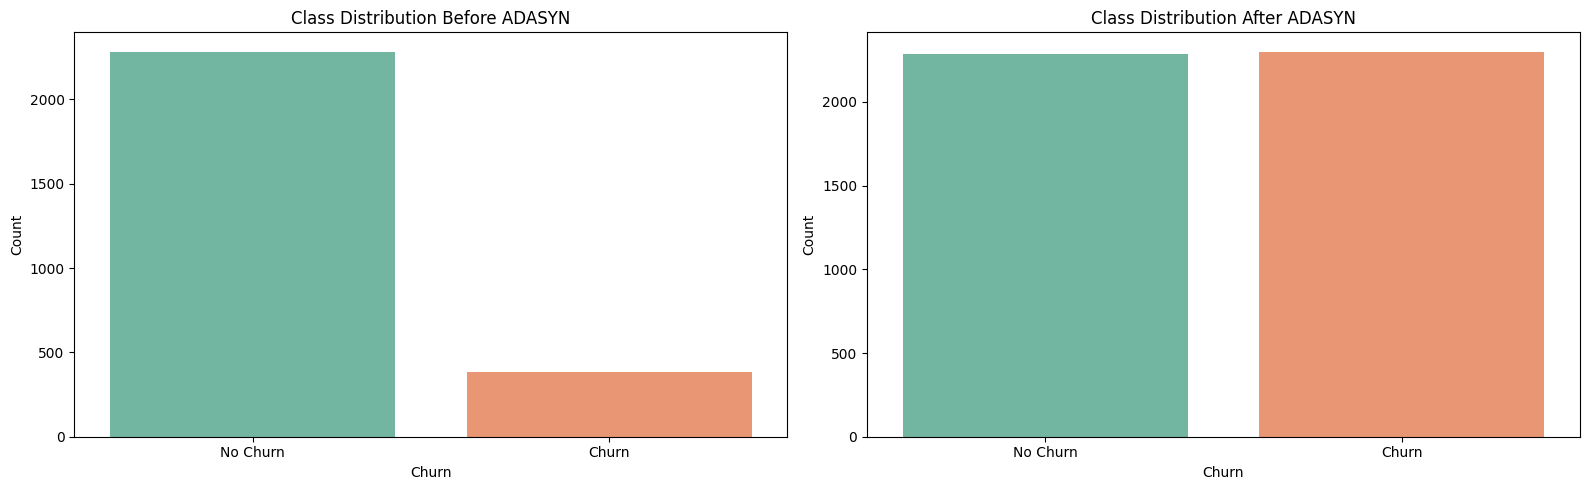

Before  After
churn               
0        2284   2284
1         382   2301

In [ ]:
from imblearn.over_sampling import ADASYN

# creating subplots for class distribution before and after ADASYN
fig, axes = plt.subplots(1, 2, figsize=(16,5))

# plotting class distribution before ADASYN
sns.countplot(x='churn', data=pd.concat([X_train, y_train], axis=1), palette='Set2', ax=axes[0], hue=y_train, legend=False)
axes[0].set_title('Class Distribution Before ADASYN')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Churn', 'Churn'])

# applying ADASYN to balance the classes
adasyn = ADASYN(random_state=42)
X_train_resample, y_train_resample = adasyn.fit_resample(X_train, y_train)

# plotting class distribution after ADASYN
sns.countplot(x=y_train_resample, palette='Set2', ax=axes[1], hue=y_train_resample, legend=False)
axes[1].set_title('Class Distribution After ADASYN')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

# Creating a DataFrame to compare before and after
before_count = pd.Series(y_train).value_counts()
after_count = pd.Series(y_train_resample).value_counts()

comparison_df = pd.DataFrame({
    'Before': before_count,
    'After': after_count
})

comparison_df

## Model Training and Evaluation

In [ ]:
# defining classification models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, verbose=0),
    'Random Forest': RandomForestClassifier(random_state=42, verbose=0),
    'Support Vector Classifier': SVC(probability=True, verbose=False),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(verbose=0),
    'XGBoost' : XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    'LightGBM' : LGBMClassifier(verbose=-1), # No verbosity
    'Naive Bayes' : GaussianNB()
}

# Set 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store the evaluation metrics for each model
metrics_comparison = {'Model' : [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []}

# Train model with 5-fold cross-validation on training data and evaluate on test data
num_models = len(models)
for i, (model_name, model) in enumerate(models.items()):

    # Perform cross-validation on training data
    accuracy_cv = cross_val_score(model,X_train_resample, y_train_resample, cv=kf, scoring='accuracy').mean()
    precision_cv = cross_val_score(model, X_train_resample, y_train_resample, cv=kf, scoring='precision').mean()
    recall_cv = cross_val_score(model, X_train_resample, y_train_resample, cv=kf, scoring='recall').mean()
    f1_cv = cross_val_score(model, X_train_resample, y_train_resample, cv=kf, scoring='f1').mean()
    roc_auc_cv = cross_val_score(model,X_train_resample, y_train_resample, cv=kf, scoring='roc_auc').mean()

    # Train the model on full resampled training set
    model.fit(X_train_resample, y_train_resample)

    # Predict on the test set
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

    # Append the results to the metrics_comparison dictionary
    metrics_comparison['Model'].append(model_name)
    metrics_comparison['Accuracy'].append(f"CV: {accuracy_cv:.4f} | Test: {accuracy_test:.4f}")
    metrics_comparison['Precision'].append(f"CV: {precision_cv:.4f} | Test: {precision_test:.4f}")
    metrics_comparison['Recall'].append(f"CV: {recall_cv:.4f} | Test: {recall_test:.4f}")
    metrics_comparison['F1 Score'].append(f"CV: {f1_cv:.4f} | Test: {f1_test:.4f}")
    metrics_comparison['ROC AUC'].append(f"CV: {roc_auc_cv:.4f} | Test: {roc_auc_test:.4f}")

    # Display percentage completion
    percent_complete = (i + 1) / num_models * 100
    print(f"Completed {percent_complete:.2f}% of evaluations.")

Completed 11.11% of evaluations.
Completed 22.22% of evaluations.
Completed 33.33% of evaluations.
Completed 44.44% of evaluations.
Completed 55.56% of evaluations.
Completed 66.67% of evaluations.
Completed 77.78% of evaluations.
Completed 88.89% of evaluations.
Completed 100.00% of evaluations.


In [ ]:
metrics_comparison = pd.DataFrame(metrics_comparison)
metrics_comparison

Model                   Accuracy  \
0        Logistic Regression  CV: 0.7607 | Test: 0.7976   
1              Random Forest  CV: 0.9549 | Test: 0.9190   
2  Support Vector Classifier  CV: 0.8798 | Test: 0.8846   
3              Decision Tree  CV: 0.8971 | Test: 0.8666   
4        K-Nearest Neighbors  CV: 0.8495 | Test: 0.7121   
5          Gradient Boosting  CV: 0.9344 | Test: 0.9280   
6                    XGBoost  CV: 0.9588 | Test: 0.9430   
7                   LightGBM  CV: 0.9581 | Test: 0.9340   
8                Naive Bayes  CV: 0.7677 | Test: 0.8411   

                   Precision                     Recall  \
0  CV: 0.7710 | Test: 0.4076  CV: 0.7445 | Test: 0.7426   
1  CV: 0.9601 | Test: 0.8219  CV: 0.9496 | Test: 0.5941   
2  CV: 0.8969 | Test: 0.6091  CV: 0.8596 | Test: 0.6634   
3  CV: 0.8865 | Test: 0.5545  CV: 0.9122 | Test: 0.6040   
4  CV: 0.7711 | Test: 0.2996  CV: 0.9965 | Test: 0.6733   
5  CV: 0.9622 | Test: 0.8442  CV: 0.9048 | Test: 0.6436   
6  CV: 0.9707 | Test: 0.9091  CV: 0.9466 | Test: 0.6931   
7  CV: 0.9708 | Test: 0.8904  CV: 0.9452 | Test: 0.6436   
8  CV: 0.8490 | Test: 0.4790  CV: 0.6536 | Test: 0.5644   

                    F1 Score                    ROC AUC  
0  CV: 0.7574 | Test: 0.5263  CV: 0.8304 | Test: 0.8332  
1  CV: 0.9548 | Test: 0.6897  CV: 0.9894 | Test: 0.9032  
2  CV: 0.8778 | Test: 0.6351  CV: 0.9510 | Test: 0.8666  
3  CV: 0.8990 | Test: 0.5782  CV: 0.8970 | Test: 0.7587  
4  CV: 0.8694 | Test: 0.4146  CV: 0.9528 | Test: 0.7561  
5  CV: 0.9325 | Test: 0.7303  CV: 0.9757 | Test: 0.9035  
6  CV: 0.9584 | Test: 0.7865  CV: 0.9890 | Test: 0.8949  
7  CV: 0.9577 | Test: 0.7471  CV: 0.9884 | Test: 0.8990  
8  CV: 0.7385 | Test: 0.5182  CV: 0.8375 | Test: 0.7977

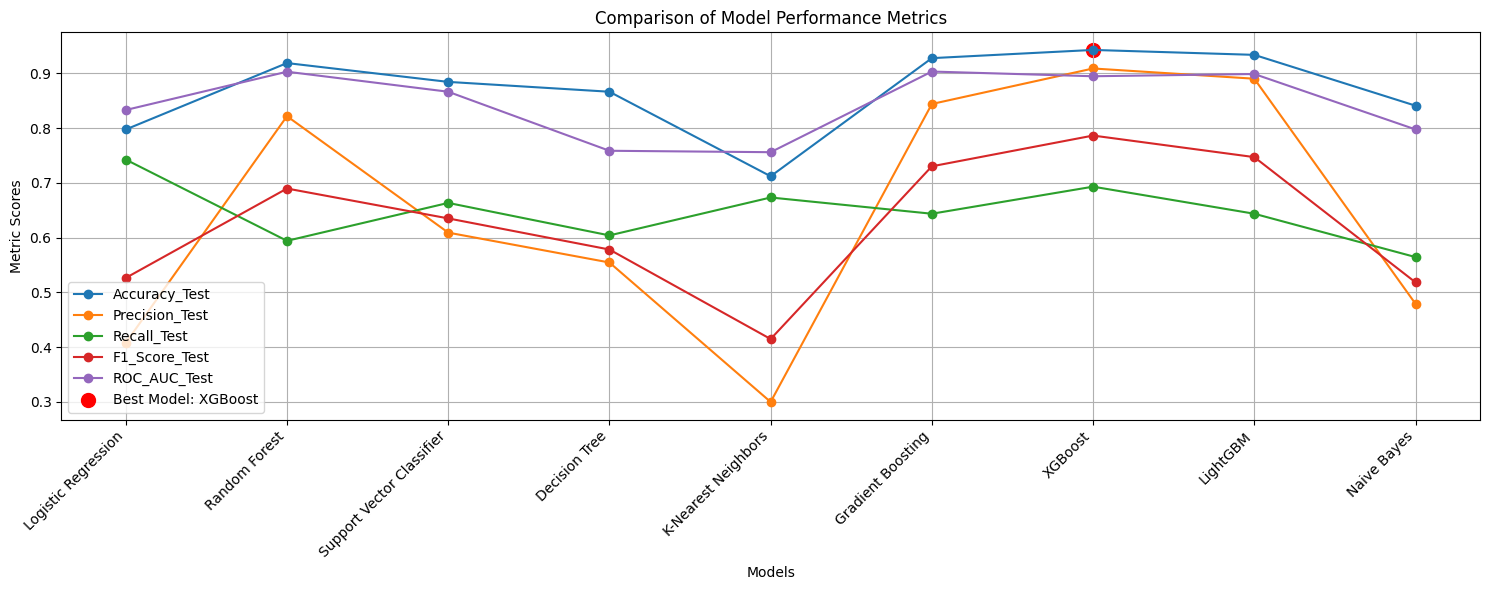

In [ ]:
# prompt: Using dataframe metrics_comparison: visualize all the metric as accuracy, precision etc and show the best model in single graph

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'metrics_comparison' is your DataFrame

# Melt the dataframe to long format for easier plotting
metrics = ['Accuracy_Test', 'Precision_Test', 'Recall_Test', 'F1_Score_Test', 'ROC_AUC_Test']
melted_df = pd.melt(metrics_comparison, id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Value')

# Create the plot
plt.figure(figsize=(15, 6))
for metric in metrics:
  plt.plot(metrics_comparison['Model'], metrics_comparison[metric], marker='o', label=metric)
plt.xticks(rotation=45, ha="right")

# Find the best model based on highest accuracy
best_model_index = metrics_comparison['Accuracy_Test'].idxmax()
best_model = metrics_comparison.loc[best_model_index, 'Model']

# Highlight the best model
plt.scatter(best_model, metrics_comparison.loc[best_model_index, 'Accuracy_Test'], color='red', s=100, label=f'Best Model: {best_model}')

plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.title("Comparison of Model Performance Metrics")
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Accuracy: 0.9430
Precision: 0.9091
Recall: 0.6931
F1 Score: 0.7865

True Negatives: 559, False Positives: 31, False Negatives: 7, True Positives: 70



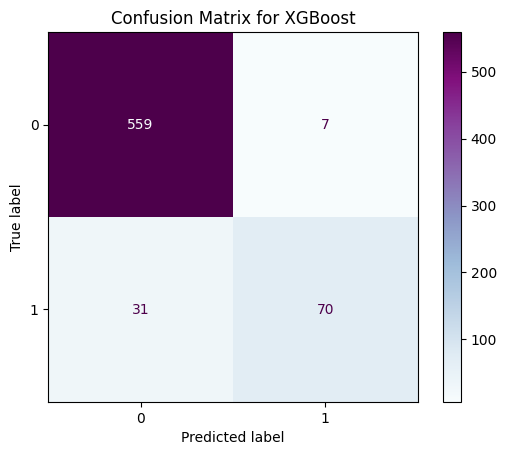

In [ ]:
best_model_name = 'XGBoost'
best_model = models[best_model_name]

# Predict on the test set
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, precision, recall, F1 score, and ROC AUC
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Print additional metrics
tn, fn, fp, tp = cm.ravel()
print(f'\nTrue Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}\n')

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
cmd.plot(cmap='BuPu')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

Accuracy: 0.9340
Precision: 0.8904
Recall: 0.6436
F1 Score: 0.7471

True Negatives: 558, False Positives: 36, False Negatives: 8, True Positives: 65



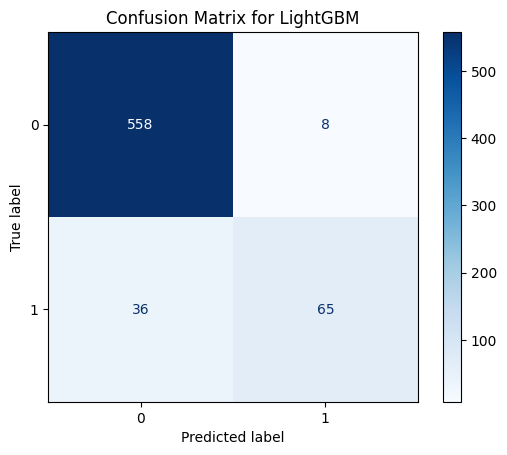

In [ ]:
best_model_name = 'LightGBM'
best_model = models[best_model_name]

# Predict on the test set
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, precision, recall, F1 score, and ROC AUC
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Print additional metrics
tn, fn, fp, tp = cm.ravel()
print(f'\nTrue Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}\n')

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
cmd.plot(cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()